In [2]:
# # Notebook de Classificação com Grid Search e Avaliação de Modelos

# ## 1. Importação das Bibliotecas Necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,RepeatedKFold,cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_prefix= "spam"

###  Lendos Dataset

In [4]:
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [5]:
columns = X.columns
X.columns = range(X.shape[1])
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [6]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [7]:
y.head(5)


,Class
0,1
1,1
2,1
3,1
4,1


### Pré-Processamento

In [8]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


<Axes: ylabel='Count'>

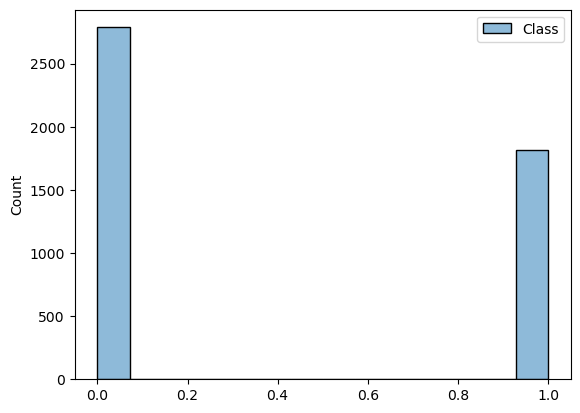

In [9]:
sns.histplot(y)

### Separando em treino  e teste

In [10]:

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Definindo os valores para o Grid Search

In [11]:

n_estimatores = [ i for i in range(10,121,20)]
max_depth = [4,6,8,10,None]
learning_rate = [round((1/(i)),5) for i in range(10,500,100)]

# ## 3. Definição dos Modelos e Parâmetros para Grid Search
# - Definir os parâmetros de busca para cada um dos modelos

# Definindo os parâmetros para cada modelo
param_grid_xgb = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'n_estimators': n_estimatores
}

param_grid_lgb = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'n_estimators': n_estimatores
}

param_grid_cat = {
    'learning_rate': learning_rate,
    'depth': max_depth,
    'iterations': n_estimatores
}

param_grid_gb = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'n_estimators': n_estimatores
}


In [12]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        total_time_seconds =(datetime.now() - start_time).total_seconds()
        thour, temp_sec = divmod(total_time_seconds, 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        return total_time_seconds
    

In [13]:

xgb = XGBClassifier(objective='binary:logistic', nthread=1)

# Aplicando Grid Search para cada modelo
print("Iniciando Grid Search para XGBoost...")
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb,cv=10,scoring="f1" 
                               #,verbose=3
                               )

tot_time = timer()
grid_search_xgb.fit(X_train,y_train)
time_grid_search_xgb = timer(tot_time)
print(time_grid_search_xgb)

print(f"best parameter:{grid_search_xgb.best_params_} - best score:{grid_search_xgb.best_score_}")

best_xgb = grid_search_xgb.best_params_


Iniciando Grid Search para XGBoost...

 Time taken: 0 hours 14 minutes and 11.46 seconds.
851.45673
best parameter:{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 110} - best score:0.9400098004724347


In [22]:

lgb =LGBMClassifier(objective="binary",n_jobs=1,verbose=0)

grid_search_lgb = GridSearchCV(lgb, param_grid_lgb,cv=10,scoring="f1"
                               #,verbose=3
                               )

tot_time = timer()
grid_search_lgb.fit(X_train,y_train)
time_grid_search_lgb = timer(tot_time)
print(time_grid_search_lgb)

print(f"best parameter:{grid_search_lgb.best_params_} - best score:{grid_search_lgb.best_score_}")

best_lgb = grid_search_lgb.best_params_


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [23]:


print("Iniciando Grid Search para CatBoost...")
cat =CatBoostClassifier(logging_level="Silent")

grid_search_cat = GridSearchCV(cat, param_grid_cat,cv=10,scoring="f1" 
                               #,verbose=3
                               )

tot_time = timer()
grid_search_cat.fit(X_train,y_train)
time_grid_search_cat = timer(tot_time)
print(time_grid_search_cat)

print(f"best parameter:{grid_search_cat.best_params_} - best score:{grid_search_cat.best_score_}")

best_cat = grid_search_cat.best_params_


Iniciando Grid Search para CatBoost...

 Time taken: 0 hours 22 minutes and 14.14 seconds.
1334.136063
best parameter:{'depth': 10, 'iterations': 90, 'learning_rate': 0.1} - best score:0.9373703806297151


In [24]:


print("Iniciando Grid Search para Gradient Boosting...")
gb =GradientBoostingClassifier()

grid_search_gb = GridSearchCV(gb, param_grid_gb,cv=10,scoring="f1"
                              #,verbose=3
                              )

tot_time = timer()
grid_search_gb.fit(X_train,y_train)
time_grid_search_gb = timer(tot_time)
print(time_grid_search_gb)

print(f"best parameter:{grid_search_gb.best_params_} - best score:{grid_search_gb.best_score_}")

best_gb = grid_search_gb.best_params_

Iniciando Grid Search para Gradient Boosting...

 Time taken: 0 hours 35 minutes and 43.09 seconds.
2143.085338
best parameter:{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 90} - best score:0.935936000423872


In [25]:
best_parameters =pd.DataFrame(index=["xgb","lgb","cat","gb"],data=[best_xgb,best_lgb,best_cat,best_gb])
best_parameters.to_csv(path_or_buf=f"best_parameters_{file_prefix}.csv",sep=",")



In [23]:
time_grid_search = best_parameters =pd.DataFrame(index=["xgb","lgb","cat","gb"],data=[time_grid_search_xgb,time_grid_search_lgb,time_grid_search_cat,time_grid_search_gb])
time_grid_search.to_csv(path_or_buf=f"time_{file_prefix}.csv",sep=",")


In [14]:
best_parameters =pd.read_csv("best_parameters_spam.csv",sep=",",index_col=[0])
best_parameters["depth"] = best_parameters["depth"]
best_parameters["max_depth"] = best_parameters["max_depth"]
best_parameters["iterations"] = best_parameters["iterations"]
best_parameters["n_estimators"] = best_parameters["n_estimators"]


best_xgb= best_parameters.loc["xgb"].dropna().to_dict()
best_lgb= best_parameters.loc["lgb"].dropna().to_dict()
best_cat= best_parameters.loc["cat"].dropna().to_dict()
best_gb= best_parameters.loc["gb"].dropna().to_dict()

best_xgb= { k: int(v) if k != "learning_rate" else v for k, v in best_xgb.items() }
best_lgb= { k: int(v) if k != "learning_rate" else v for k, v in best_lgb.items() }
best_cat= { k: int(v) if k != "learning_rate" else v for k, v in best_cat.items() }
best_gb= { k: int(v) if k != "learning_rate" else v for k, v in best_gb.items() }




In [15]:
xgb = XGBClassifier(objective='binary:logistic', **best_xgb)
xgb.fit(X_train,y_train)

lgb = LGBMClassifier(**best_lgb)
lgb.fit(X_train,y_train)

cat = CatBoostClassifier(**best_cat)
cat.fit(X_train,y_train)

gb = GradientBoostingClassifier(**best_gb)
gb.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1236, number of negative: 1984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6584
[LightGBM] [Info] Number of data points in the train set: 3220, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383851 -> initscore=-0.473235
[LightGBM] [Info] Start training from score -0.473235
0:	learn: 0.5814227	total: 351ms	remaining: 31.2s
1:	learn: 0.5049024	total: 493ms	remaining: 21.7s
2:	learn: 0.4366984	total: 671ms	remaining: 19.5s
3:	learn: 0.3830025	total: 854ms	remaining: 18.4s
4:	learn: 0.3430652	total: 1.01s	remaining: 17.1s
5:	learn: 0.3023539	total: 1.16s	remaining: 16.2s
6:	learn: 0.2747688	total: 1.32s	remaining: 15.7s
7:	learn: 0.2580577	total: 1.47s	remaining: 15.1s
8:	learn: 0.2398999	total: 1.63s	remaining: 1

GradientBoostingClassifier(max_depth=8, n_estimators=90)

In [16]:

# ## 5. Avaliação dos Modelos

# Função para avaliar os modelos
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return y_pred

# Avaliar cada modelo
print("Avaliação do melhor modelo XGBoost")
y_pred_xgb = evaluate_model(xgb, X_test, y_test)

print("Avaliação do melhor modelo LightGBM")
y_pred_lgb = evaluate_model(lgb, X_test, y_test)

print("Avaliação do melhor modelo CatBoost")
y_pred_cat = evaluate_model(cat, X_test, y_test)

print("Avaliação do melhor modelo Gradient Boosting")
y_pred_gb = evaluate_model(gb, X_test, y_test)


Avaliação do melhor modelo XGBoost
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       804
           1       0.96      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381

Avaliação do melhor modelo LightGBM
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       804
           1       0.96      0.95      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.96      0.96      1381
weighted avg       0.96      0.96      0.96      1381

Avaliação do melhor modelo CatBoost
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       804
           1       0.96      0.94      0.95       577

    accuracy                           0.96      1381
   macro avg       0.

In [17]:

# ## 6. Plotar a Matriz de Confusão do Melhor Modelo

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Plotando a Matriz de Confusão para XGBoost


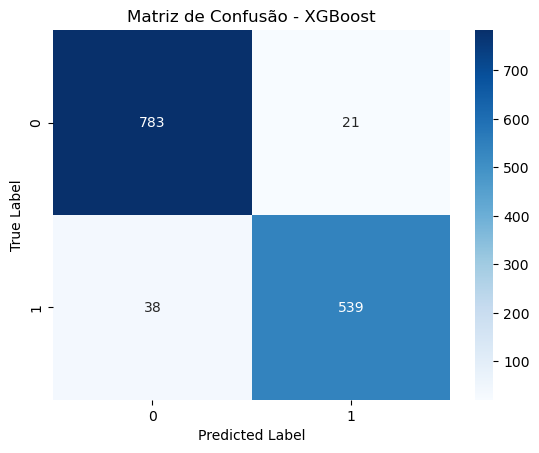

In [18]:

# Exemplo para o melhor modelo (substitua pelo modelo vencedor):
print("Plotando a Matriz de Confusão para XGBoost")
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')


Plotando a Matriz de Confusão para Lgb


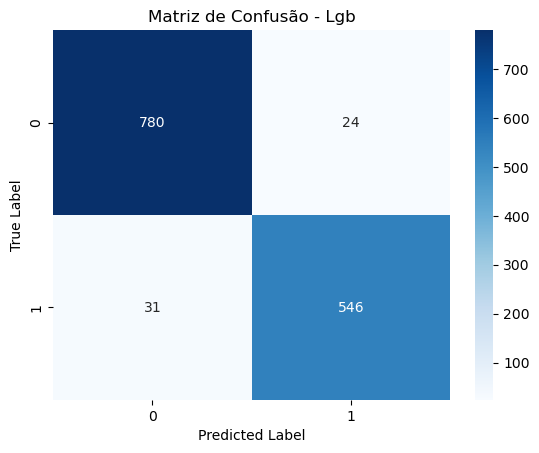

In [19]:
print("Plotando a Matriz de Confusão para Lgb")
plot_confusion_matrix(y_test, y_pred_lgb, 'Lgb')

Plotando a Matriz de Confusão para Cat


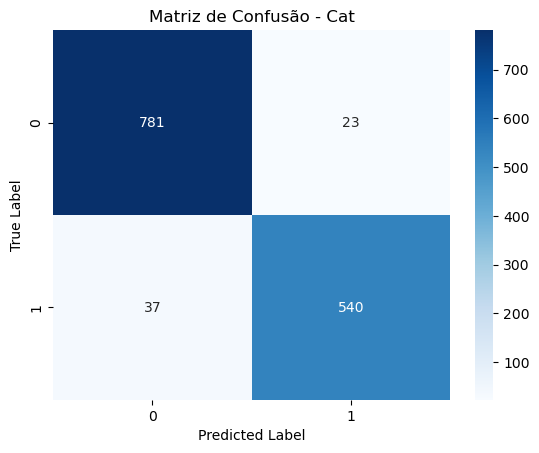

In [20]:
print("Plotando a Matriz de Confusão para Cat")
plot_confusion_matrix(y_test, y_pred_cat, 'Cat')

Plotando a Matriz de Confusão para GB


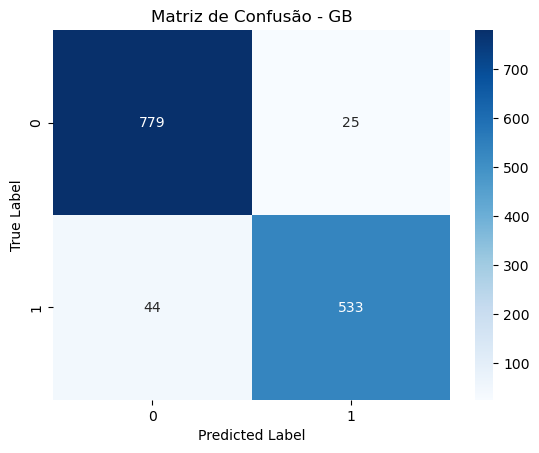

In [21]:
print("Plotando a Matriz de Confusão para GB")
plot_confusion_matrix(y_test, y_pred_gb, 'GB')

### Reapeated Kfold

In [22]:
cross_val_cancer_scores={}

XGBoost

In [23]:
model = XGBClassifier(objective='binary:logistic', **best_xgb)

cv =RepeatedKFold(n_repeats=10,n_splits=10)
scoring =["accuracy","f1","precision","recall","roc_auc"]

cross_val_cancer_scores["xgb"] =cross_validate(model,X,y,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

In [24]:
print("Média")
print(pd.DataFrame(cross_val_cancer_scores["xgb"]).mean(axis=0))
print()
print("Desvio Padrão")
print(pd.DataFrame(cross_val_cancer_scores["xgb"]).std(axis=0))


Média
fit_time          1.163397
score_time        0.159009
test_accuracy     0.954705
test_f1           0.942069
test_precision    0.946593
test_recall       0.937924
test_roc_auc      0.988818
dtype: float64

Desvio Padrão
fit_time          0.029089
score_time        0.010798
test_accuracy     0.010163
test_f1           0.013511
test_precision    0.017257
test_recall       0.019384
test_roc_auc      0.004550
dtype: float64


In [25]:
model = LGBMClassifier(**best_lgb)

cv =RepeatedKFold(n_repeats=10,n_splits=10)
scoring =["accuracy","f1","precision","recall","roc_auc"]

cross_val_cancer_scores["lgb"] =cross_validate(model,X,y,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

[LightGBM] [Info] Number of positive: 1633, number of negative: 2507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7398
[LightGBM] [Info] Number of data points in the train set: 4140, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394444 -> initscore=-0.428668
[LightGBM] [Info] Start training from score -0.428668
[LightGBM] [Info] Number of positive: 1623, number of negative: 2518
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7402
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.391934 -> initscore=-0.439189
[LightGB

[LightGBM] [Info] Number of positive: 1629, number of negative: 2512
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7424
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393383 -> initscore=-0.433113
[LightGBM] [Info] Start training from score -0.433113
[LightGBM] [Info] Number of positive: 1627, number of negative: 2514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7375
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binar

[LightGBM] [Info] Number of positive: 1632, number of negative: 2508
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7416
[LightGBM] [Info] Number of data points in the train set: 4140, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394203 -> initscore=-0.429679
[LightGBM] [Info] Start training from score -0.429679
[LightGBM] [Info] Number of positive: 1625, number of negative: 2516
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7380
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binar

[LightGBM] [Info] Number of positive: 1621, number of negative: 2520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7416
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.391451 -> initscore=-0.441216
[LightGBM] [Info] Start training from score -0.441216
[LightGBM] [Info] Number of positive: 1631, number of negative: 2510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7412
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binar

[LightGBM] [Info] Number of positive: 1621, number of negative: 2519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7402
[LightGBM] [Info] Number of data points in the train set: 4140, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.391546 -> initscore=-0.440819
[LightGBM] [Info] Start training from score -0.440819
[LightGBM] [Info] Number of positive: 1632, number of negative: 2509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7394
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binar

[LightGBM] [Info] Number of positive: 1628, number of negative: 2513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7424
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393142 -> initscore=-0.434125
[LightGBM] [Info] Start training from score -0.434125
[LightGBM] [Info] Number of positive: 1636, number of negative: 2505
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7406
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binar

[LightGBM] [Info] Number of positive: 1654, number of negative: 2487
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7423
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399420 -> initscore=-0.407881
[LightGBM] [Info] Start training from score -0.407881
[LightGBM] [Info] Number of positive: 1617, number of negative: 2524
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7409
[LightGBM] [Info] Number of data points in the train set: 4141, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390485 -> initscore=-0.445272
[LightGB

In [26]:
print("Média")
print(pd.DataFrame(cross_val_cancer_scores["lgb"]).mean(axis=0))
print()
print("Desvio Padrão")
print(pd.DataFrame(cross_val_cancer_scores["lgb"]).std(axis=0))

Média
fit_time          0.302557
score_time        0.047351
test_accuracy     0.958248
test_f1           0.946945
test_precision    0.948195
test_recall       0.946051
test_roc_auc      0.990045
dtype: float64

Desvio Padrão
fit_time          0.026940
score_time        0.011951
test_accuracy     0.008229
test_f1           0.010218
test_precision    0.017047
test_recall       0.015921
test_roc_auc      0.003512
dtype: float64


In [32]:
model = CatBoostClassifier(**best_cat)

cv =RepeatedKFold(n_repeats=10,n_splits=10)
scoring =["accuracy","f1","precision","recall","roc_auc"]

cross_val_cancer_scores["cat"] =cross_validate(model,X,y,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

0:	learn: 0.5750757	total: 224ms	remaining: 19.9s
1:	learn: 0.4910673	total: 440ms	remaining: 19.4s
2:	learn: 0.4250274	total: 636ms	remaining: 18.4s
3:	learn: 0.3667480	total: 868ms	remaining: 18.7s
4:	learn: 0.3245058	total: 1.1s	remaining: 18.7s
5:	learn: 0.2898002	total: 1.3s	remaining: 18.1s
6:	learn: 0.2656067	total: 1.49s	remaining: 17.7s
7:	learn: 0.2453082	total: 1.7s	remaining: 17.4s
8:	learn: 0.2303936	total: 1.9s	remaining: 17.1s
9:	learn: 0.2133914	total: 2.12s	remaining: 17s
10:	learn: 0.2023451	total: 2.33s	remaining: 16.7s
11:	learn: 0.1905783	total: 2.54s	remaining: 16.5s
12:	learn: 0.1829905	total: 2.75s	remaining: 16.3s
13:	learn: 0.1747107	total: 2.96s	remaining: 16.1s
14:	learn: 0.1664568	total: 3.17s	remaining: 15.9s
15:	learn: 0.1605175	total: 3.4s	remaining: 15.7s
16:	learn: 0.1563020	total: 3.62s	remaining: 15.5s
17:	learn: 0.1507689	total: 3.83s	remaining: 15.3s
18:	learn: 0.1458000	total: 4.05s	remaining: 15.1s
19:	learn: 0.1415970	total: 4.28s	remaining: 15s

74:	learn: 0.0780125	total: 15.9s	remaining: 3.17s
75:	learn: 0.0776066	total: 16.1s	remaining: 2.96s
76:	learn: 0.0772944	total: 16.3s	remaining: 2.75s
77:	learn: 0.0768225	total: 16.5s	remaining: 2.54s
78:	learn: 0.0762755	total: 16.7s	remaining: 2.33s
79:	learn: 0.0757203	total: 16.9s	remaining: 2.11s
80:	learn: 0.0755006	total: 17.1s	remaining: 1.9s
81:	learn: 0.0750621	total: 17.3s	remaining: 1.69s
82:	learn: 0.0748292	total: 17.4s	remaining: 1.47s
83:	learn: 0.0743507	total: 17.7s	remaining: 1.26s
84:	learn: 0.0738542	total: 17.9s	remaining: 1.05s
85:	learn: 0.0737603	total: 18.1s	remaining: 841ms
86:	learn: 0.0733180	total: 18.3s	remaining: 631ms
87:	learn: 0.0730713	total: 18.5s	remaining: 421ms
88:	learn: 0.0729798	total: 18.8s	remaining: 211ms
89:	learn: 0.0728888	total: 19s	remaining: 0us
0:	learn: 0.5607705	total: 206ms	remaining: 18.3s
1:	learn: 0.4804735	total: 426ms	remaining: 18.8s
2:	learn: 0.4185414	total: 637ms	remaining: 18.5s
3:	learn: 0.3663141	total: 845ms	remain

57:	learn: 0.0917504	total: 12.2s	remaining: 6.74s
58:	learn: 0.0908902	total: 12.4s	remaining: 6.53s
59:	learn: 0.0897995	total: 12.6s	remaining: 6.32s
60:	learn: 0.0894047	total: 12.8s	remaining: 6.1s
61:	learn: 0.0882114	total: 13s	remaining: 5.88s
62:	learn: 0.0871086	total: 13.2s	remaining: 5.68s
63:	learn: 0.0870182	total: 13.4s	remaining: 5.46s
64:	learn: 0.0863681	total: 13.7s	remaining: 5.26s
65:	learn: 0.0847779	total: 13.9s	remaining: 5.04s
66:	learn: 0.0839353	total: 14.1s	remaining: 4.83s
67:	learn: 0.0836737	total: 14.3s	remaining: 4.62s
68:	learn: 0.0830519	total: 14.5s	remaining: 4.41s
69:	learn: 0.0826795	total: 14.7s	remaining: 4.2s
70:	learn: 0.0814118	total: 14.9s	remaining: 3.99s
71:	learn: 0.0808023	total: 15.1s	remaining: 3.77s
72:	learn: 0.0800725	total: 15.3s	remaining: 3.57s
73:	learn: 0.0788240	total: 15.5s	remaining: 3.36s
74:	learn: 0.0777386	total: 15.7s	remaining: 3.15s
75:	learn: 0.0772948	total: 15.9s	remaining: 2.93s
76:	learn: 0.0762101	total: 16.1s	r

40:	learn: 0.1015491	total: 8.56s	remaining: 10.2s
41:	learn: 0.1003123	total: 8.75s	remaining: 10s
42:	learn: 0.0991000	total: 8.96s	remaining: 9.79s
43:	learn: 0.0984788	total: 9.18s	remaining: 9.6s
44:	learn: 0.0978326	total: 9.39s	remaining: 9.39s
45:	learn: 0.0977215	total: 9.63s	remaining: 9.21s
46:	learn: 0.0968577	total: 9.82s	remaining: 8.99s
47:	learn: 0.0954815	total: 10s	remaining: 8.77s
48:	learn: 0.0945004	total: 10.2s	remaining: 8.57s
49:	learn: 0.0938992	total: 10.5s	remaining: 8.37s
50:	learn: 0.0934002	total: 10.7s	remaining: 8.16s
51:	learn: 0.0919905	total: 10.9s	remaining: 7.95s
52:	learn: 0.0913401	total: 11.1s	remaining: 7.76s
53:	learn: 0.0905323	total: 11.3s	remaining: 7.55s
54:	learn: 0.0893083	total: 11.5s	remaining: 7.34s
55:	learn: 0.0865565	total: 11.8s	remaining: 7.13s
56:	learn: 0.0858554	total: 11.9s	remaining: 6.92s
57:	learn: 0.0852007	total: 12.2s	remaining: 6.72s
58:	learn: 0.0843375	total: 12.4s	remaining: 6.52s
59:	learn: 0.0835981	total: 12.6s	re

22:	learn: 0.1332164	total: 4.96s	remaining: 14.4s
23:	learn: 0.1310026	total: 5.17s	remaining: 14.2s
24:	learn: 0.1277254	total: 5.41s	remaining: 14.1s
25:	learn: 0.1259552	total: 5.64s	remaining: 13.9s
26:	learn: 0.1231527	total: 5.84s	remaining: 13.6s
27:	learn: 0.1216377	total: 6.07s	remaining: 13.4s
28:	learn: 0.1199376	total: 6.28s	remaining: 13.2s
29:	learn: 0.1183269	total: 6.49s	remaining: 13s
30:	learn: 0.1155402	total: 6.74s	remaining: 12.8s
31:	learn: 0.1137660	total: 6.94s	remaining: 12.6s
32:	learn: 0.1124444	total: 7.16s	remaining: 12.4s
33:	learn: 0.1115223	total: 7.36s	remaining: 12.1s
34:	learn: 0.1099455	total: 7.56s	remaining: 11.9s
35:	learn: 0.1081597	total: 7.78s	remaining: 11.7s
36:	learn: 0.1061116	total: 7.98s	remaining: 11.4s
37:	learn: 0.1048886	total: 8.21s	remaining: 11.2s
38:	learn: 0.1037131	total: 8.42s	remaining: 11s
39:	learn: 0.1025108	total: 8.65s	remaining: 10.8s
40:	learn: 0.1016784	total: 8.91s	remaining: 10.7s
41:	learn: 0.1014206	total: 9.16s	r

4:	learn: 0.3240362	total: 1.08s	remaining: 18.4s
5:	learn: 0.2907893	total: 1.29s	remaining: 18.1s
6:	learn: 0.2655911	total: 1.52s	remaining: 18s
7:	learn: 0.2447590	total: 1.74s	remaining: 17.8s
8:	learn: 0.2284245	total: 1.94s	remaining: 17.4s
9:	learn: 0.2123618	total: 2.16s	remaining: 17.3s
10:	learn: 0.2027850	total: 2.37s	remaining: 17s
11:	learn: 0.1915389	total: 2.6s	remaining: 16.9s
12:	learn: 0.1827581	total: 2.82s	remaining: 16.7s
13:	learn: 0.1745989	total: 3.04s	remaining: 16.5s
14:	learn: 0.1682899	total: 3.24s	remaining: 16.2s
15:	learn: 0.1614540	total: 3.46s	remaining: 16s
16:	learn: 0.1577361	total: 3.68s	remaining: 15.8s
17:	learn: 0.1538604	total: 3.9s	remaining: 15.6s
18:	learn: 0.1488285	total: 4.12s	remaining: 15.4s
19:	learn: 0.1448778	total: 4.36s	remaining: 15.3s
20:	learn: 0.1403882	total: 4.57s	remaining: 15s
21:	learn: 0.1368965	total: 4.77s	remaining: 14.7s
22:	learn: 0.1335991	total: 4.97s	remaining: 14.5s
23:	learn: 0.1292850	total: 5.18s	remaining: 14

76:	learn: 0.0804467	total: 17.2s	remaining: 2.9s
77:	learn: 0.0799345	total: 17.4s	remaining: 2.68s
78:	learn: 0.0797800	total: 17.6s	remaining: 2.45s
79:	learn: 0.0794550	total: 17.8s	remaining: 2.23s
80:	learn: 0.0792252	total: 18s	remaining: 2s
81:	learn: 0.0785127	total: 18.2s	remaining: 1.78s
82:	learn: 0.0780351	total: 18.4s	remaining: 1.56s
83:	learn: 0.0774087	total: 18.7s	remaining: 1.33s
84:	learn: 0.0772454	total: 18.9s	remaining: 1.11s
85:	learn: 0.0770967	total: 18.9s	remaining: 880ms
86:	learn: 0.0766295	total: 19.1s	remaining: 660ms
87:	learn: 0.0765453	total: 19.4s	remaining: 440ms
88:	learn: 0.0764636	total: 19.6s	remaining: 220ms
89:	learn: 0.0763198	total: 19.8s	remaining: 0us
0:	learn: 0.5803909	total: 215ms	remaining: 19.2s
1:	learn: 0.5020380	total: 429ms	remaining: 18.9s
2:	learn: 0.4309366	total: 663ms	remaining: 19.2s
3:	learn: 0.3717456	total: 889ms	remaining: 19.1s
4:	learn: 0.3235826	total: 1.1s	remaining: 18.7s
5:	learn: 0.2941148	total: 1.3s	remaining: 18

59:	learn: 0.0857477	total: 13s	remaining: 6.48s
60:	learn: 0.0849420	total: 13.2s	remaining: 6.26s
61:	learn: 0.0837584	total: 13.4s	remaining: 6.04s
62:	learn: 0.0827612	total: 13.6s	remaining: 5.83s
63:	learn: 0.0825108	total: 13.8s	remaining: 5.61s
64:	learn: 0.0823466	total: 14s	remaining: 5.39s
65:	learn: 0.0811591	total: 14.2s	remaining: 5.17s
66:	learn: 0.0808728	total: 14.4s	remaining: 4.95s
67:	learn: 0.0801824	total: 14.6s	remaining: 4.73s
68:	learn: 0.0795189	total: 14.8s	remaining: 4.51s
69:	learn: 0.0788875	total: 15s	remaining: 4.29s
70:	learn: 0.0784902	total: 15.3s	remaining: 4.08s
71:	learn: 0.0780601	total: 15.4s	remaining: 3.86s
72:	learn: 0.0771885	total: 15.7s	remaining: 3.65s
73:	learn: 0.0768574	total: 15.8s	remaining: 3.43s
74:	learn: 0.0767396	total: 16.1s	remaining: 3.21s
75:	learn: 0.0764050	total: 16.3s	remaining: 3s
76:	learn: 0.0759091	total: 16.5s	remaining: 2.79s
77:	learn: 0.0755300	total: 16.7s	remaining: 2.57s
78:	learn: 0.0750794	total: 16.9s	remain

41:	learn: 0.1012044	total: 8.98s	remaining: 10.3s
42:	learn: 0.1003660	total: 9.23s	remaining: 10.1s
43:	learn: 0.0991881	total: 9.44s	remaining: 9.87s
44:	learn: 0.0982219	total: 9.66s	remaining: 9.66s
45:	learn: 0.0973585	total: 9.86s	remaining: 9.43s
46:	learn: 0.0963980	total: 10.1s	remaining: 9.21s
47:	learn: 0.0960300	total: 10.3s	remaining: 8.99s
48:	learn: 0.0937475	total: 10.5s	remaining: 8.77s
49:	learn: 0.0925113	total: 10.7s	remaining: 8.56s
50:	learn: 0.0912537	total: 10.9s	remaining: 8.35s
51:	learn: 0.0904282	total: 11.1s	remaining: 8.13s
52:	learn: 0.0897749	total: 11.4s	remaining: 7.93s
53:	learn: 0.0892498	total: 11.6s	remaining: 7.73s
54:	learn: 0.0882645	total: 11.8s	remaining: 7.51s
55:	learn: 0.0875215	total: 12s	remaining: 7.29s
56:	learn: 0.0865203	total: 12.2s	remaining: 7.07s
57:	learn: 0.0858303	total: 12.4s	remaining: 6.86s
58:	learn: 0.0856296	total: 12.6s	remaining: 6.64s
59:	learn: 0.0852636	total: 12.9s	remaining: 6.43s
60:	learn: 0.0840397	total: 13.1s

23:	learn: 0.1325013	total: 5.23s	remaining: 14.4s
24:	learn: 0.1310994	total: 5.45s	remaining: 14.2s
25:	learn: 0.1287291	total: 5.68s	remaining: 14s
26:	learn: 0.1261791	total: 5.88s	remaining: 13.7s
27:	learn: 0.1240985	total: 6.11s	remaining: 13.5s
28:	learn: 0.1230186	total: 6.31s	remaining: 13.3s
29:	learn: 0.1217147	total: 6.51s	remaining: 13s
30:	learn: 0.1207862	total: 6.73s	remaining: 12.8s
31:	learn: 0.1194939	total: 6.94s	remaining: 12.6s
32:	learn: 0.1182730	total: 7.14s	remaining: 12.3s
33:	learn: 0.1166500	total: 7.34s	remaining: 12.1s
34:	learn: 0.1155783	total: 7.56s	remaining: 11.9s
35:	learn: 0.1133720	total: 7.79s	remaining: 11.7s
36:	learn: 0.1130923	total: 8s	remaining: 11.5s
37:	learn: 0.1112817	total: 8.2s	remaining: 11.2s
38:	learn: 0.1106443	total: 8.42s	remaining: 11s
39:	learn: 0.1089553	total: 8.61s	remaining: 10.8s
40:	learn: 0.1083341	total: 8.81s	remaining: 10.5s
41:	learn: 0.1076558	total: 9s	remaining: 10.3s
42:	learn: 0.1056327	total: 9.19s	remaining:

6:	learn: 0.2532549	total: 1.48s	remaining: 17.5s
7:	learn: 0.2329979	total: 1.72s	remaining: 17.6s
8:	learn: 0.2183467	total: 1.92s	remaining: 17.3s
9:	learn: 0.2044434	total: 2.15s	remaining: 17.2s
10:	learn: 0.1940528	total: 2.36s	remaining: 16.9s
11:	learn: 0.1827516	total: 2.56s	remaining: 16.7s
12:	learn: 0.1739126	total: 2.79s	remaining: 16.5s
13:	learn: 0.1657807	total: 3.01s	remaining: 16.3s
14:	learn: 0.1600092	total: 3.23s	remaining: 16.1s
15:	learn: 0.1551462	total: 3.46s	remaining: 16s
16:	learn: 0.1514238	total: 3.69s	remaining: 15.9s
17:	learn: 0.1475389	total: 3.89s	remaining: 15.6s
18:	learn: 0.1431181	total: 4.11s	remaining: 15.3s
19:	learn: 0.1392197	total: 4.32s	remaining: 15.1s
20:	learn: 0.1354496	total: 4.55s	remaining: 14.9s
21:	learn: 0.1321233	total: 4.78s	remaining: 14.8s
22:	learn: 0.1296409	total: 5s	remaining: 14.6s
23:	learn: 0.1267004	total: 5.22s	remaining: 14.4s
24:	learn: 0.1254576	total: 5.44s	remaining: 14.2s
25:	learn: 0.1219234	total: 5.66s	remain

79:	learn: 0.0706076	total: 16.7s	remaining: 2.09s
80:	learn: 0.0703278	total: 16.9s	remaining: 1.88s
81:	learn: 0.0701794	total: 17.1s	remaining: 1.67s
82:	learn: 0.0695212	total: 17.3s	remaining: 1.46s
83:	learn: 0.0690908	total: 17.5s	remaining: 1.25s
84:	learn: 0.0680956	total: 17.7s	remaining: 1.04s
85:	learn: 0.0678682	total: 18s	remaining: 835ms
86:	learn: 0.0676261	total: 18.2s	remaining: 626ms
87:	learn: 0.0675473	total: 18.4s	remaining: 418ms
88:	learn: 0.0666274	total: 18.6s	remaining: 209ms
89:	learn: 0.0661073	total: 18.8s	remaining: 0us
0:	learn: 0.5731340	total: 220ms	remaining: 19.6s
1:	learn: 0.4765350	total: 433ms	remaining: 19s
2:	learn: 0.4143526	total: 659ms	remaining: 19.1s
3:	learn: 0.3631404	total: 857ms	remaining: 18.4s
4:	learn: 0.3224499	total: 1.08s	remaining: 18.3s
5:	learn: 0.2916454	total: 1.3s	remaining: 18.2s
6:	learn: 0.2650656	total: 1.5s	remaining: 17.8s
7:	learn: 0.2472289	total: 1.71s	remaining: 17.6s
8:	learn: 0.2298743	total: 1.93s	remaining: 17.

62:	learn: 0.0815023	total: 13.6s	remaining: 5.83s
63:	learn: 0.0812592	total: 13.8s	remaining: 5.61s
64:	learn: 0.0806985	total: 14s	remaining: 5.38s
65:	learn: 0.0789134	total: 14.2s	remaining: 5.17s
66:	learn: 0.0773234	total: 14.4s	remaining: 4.95s
67:	learn: 0.0767481	total: 14.6s	remaining: 4.73s
68:	learn: 0.0760785	total: 14.9s	remaining: 4.52s
69:	learn: 0.0755108	total: 15.1s	remaining: 4.3s
70:	learn: 0.0754455	total: 15.3s	remaining: 4.09s
71:	learn: 0.0748094	total: 15.5s	remaining: 3.88s
72:	learn: 0.0746871	total: 15.7s	remaining: 3.66s
73:	learn: 0.0744217	total: 16s	remaining: 3.45s
74:	learn: 0.0734863	total: 16.2s	remaining: 3.24s
75:	learn: 0.0730397	total: 16.4s	remaining: 3.02s
76:	learn: 0.0727439	total: 16.6s	remaining: 2.81s
77:	learn: 0.0714469	total: 16.8s	remaining: 2.59s
78:	learn: 0.0704102	total: 17s	remaining: 2.37s
79:	learn: 0.0700694	total: 17.2s	remaining: 2.15s
80:	learn: 0.0695583	total: 17.5s	remaining: 1.94s
81:	learn: 0.0693173	total: 17.7s	rema

45:	learn: 0.0948655	total: 9.92s	remaining: 9.49s
46:	learn: 0.0939054	total: 10.1s	remaining: 9.26s
47:	learn: 0.0928878	total: 10.3s	remaining: 9.05s
48:	learn: 0.0916156	total: 10.5s	remaining: 8.81s
49:	learn: 0.0912920	total: 10.7s	remaining: 8.6s
50:	learn: 0.0907238	total: 11s	remaining: 8.39s
51:	learn: 0.0886804	total: 11.2s	remaining: 8.17s
52:	learn: 0.0878236	total: 11.4s	remaining: 7.94s
53:	learn: 0.0870342	total: 11.6s	remaining: 7.73s
54:	learn: 0.0860811	total: 11.8s	remaining: 7.51s
55:	learn: 0.0848897	total: 12.1s	remaining: 7.32s
56:	learn: 0.0841526	total: 12.3s	remaining: 7.11s
57:	learn: 0.0829598	total: 12.5s	remaining: 6.88s
58:	learn: 0.0812714	total: 12.7s	remaining: 6.66s
59:	learn: 0.0807686	total: 12.9s	remaining: 6.45s
60:	learn: 0.0803690	total: 13.1s	remaining: 6.24s
61:	learn: 0.0795440	total: 13.3s	remaining: 6.03s
62:	learn: 0.0787345	total: 13.5s	remaining: 5.8s
63:	learn: 0.0785277	total: 13.8s	remaining: 5.59s
64:	learn: 0.0781478	total: 14s	rem

29:	learn: 0.1184562	total: 6.53s	remaining: 13.1s
30:	learn: 0.1163812	total: 6.76s	remaining: 12.9s
31:	learn: 0.1146755	total: 6.97s	remaining: 12.6s
32:	learn: 0.1124802	total: 7.2s	remaining: 12.4s
33:	learn: 0.1120288	total: 7.4s	remaining: 12.2s
34:	learn: 0.1118206	total: 7.62s	remaining: 12s
35:	learn: 0.1108655	total: 7.84s	remaining: 11.8s
36:	learn: 0.1095982	total: 8.07s	remaining: 11.6s
37:	learn: 0.1075829	total: 8.3s	remaining: 11.4s
38:	learn: 0.1063270	total: 8.51s	remaining: 11.1s
39:	learn: 0.1040457	total: 8.75s	remaining: 10.9s
40:	learn: 0.1029768	total: 8.96s	remaining: 10.7s
41:	learn: 0.1008641	total: 9.15s	remaining: 10.5s
42:	learn: 0.0999008	total: 9.37s	remaining: 10.2s
43:	learn: 0.0984020	total: 9.58s	remaining: 10s
44:	learn: 0.0969938	total: 9.81s	remaining: 9.81s
45:	learn: 0.0959028	total: 10s	remaining: 9.59s
46:	learn: 0.0955092	total: 10.3s	remaining: 9.38s
47:	learn: 0.0951462	total: 10.5s	remaining: 9.17s
48:	learn: 0.0941643	total: 10.7s	remain

12:	learn: 0.1796614	total: 2.82s	remaining: 16.7s
13:	learn: 0.1701797	total: 3.03s	remaining: 16.5s
14:	learn: 0.1632230	total: 3.22s	remaining: 16.1s
15:	learn: 0.1580859	total: 3.42s	remaining: 15.8s
16:	learn: 0.1515573	total: 3.64s	remaining: 15.6s
17:	learn: 0.1464185	total: 3.88s	remaining: 15.5s
18:	learn: 0.1419241	total: 4.19s	remaining: 15.7s
19:	learn: 0.1370609	total: 4.44s	remaining: 15.5s
20:	learn: 0.1333599	total: 4.72s	remaining: 15.5s
21:	learn: 0.1305426	total: 5s	remaining: 15.5s
22:	learn: 0.1278041	total: 5.2s	remaining: 15.1s
23:	learn: 0.1249108	total: 5.49s	remaining: 15.1s
24:	learn: 0.1233324	total: 5.69s	remaining: 14.8s
25:	learn: 0.1214337	total: 5.92s	remaining: 14.6s
26:	learn: 0.1191625	total: 6.14s	remaining: 14.3s
27:	learn: 0.1174424	total: 6.36s	remaining: 14.1s
28:	learn: 0.1162568	total: 6.63s	remaining: 13.9s
29:	learn: 0.1147094	total: 6.89s	remaining: 13.8s
30:	learn: 0.1139314	total: 7.15s	remaining: 13.6s
31:	learn: 0.1121322	total: 7.37s	r

86:	learn: 0.0750057	total: 18.9s	remaining: 651ms
87:	learn: 0.0748745	total: 19.1s	remaining: 433ms
88:	learn: 0.0742437	total: 19.2s	remaining: 216ms
89:	learn: 0.0739315	total: 19.4s	remaining: 0us
0:	learn: 0.5685176	total: 211ms	remaining: 18.8s
1:	learn: 0.4863105	total: 447ms	remaining: 19.7s
2:	learn: 0.4217238	total: 653ms	remaining: 18.9s
3:	learn: 0.3628641	total: 883ms	remaining: 19s
4:	learn: 0.3214299	total: 1.08s	remaining: 18.3s
5:	learn: 0.2871839	total: 1.31s	remaining: 18.3s
6:	learn: 0.2650278	total: 1.52s	remaining: 18s
7:	learn: 0.2476565	total: 1.73s	remaining: 17.7s
8:	learn: 0.2275572	total: 1.97s	remaining: 17.7s
9:	learn: 0.2143367	total: 2.17s	remaining: 17.4s
10:	learn: 0.2047686	total: 2.42s	remaining: 17.4s
11:	learn: 0.1957751	total: 2.62s	remaining: 17s
12:	learn: 0.1859749	total: 2.84s	remaining: 16.8s
13:	learn: 0.1767826	total: 3.04s	remaining: 16.5s
14:	learn: 0.1703363	total: 3.25s	remaining: 16.2s
15:	learn: 0.1635320	total: 3.46s	remaining: 16s


69:	learn: 0.0792440	total: 15.6s	remaining: 4.45s
70:	learn: 0.0783277	total: 15.8s	remaining: 4.23s
71:	learn: 0.0774898	total: 16s	remaining: 4s
72:	learn: 0.0763671	total: 16.2s	remaining: 3.77s
73:	learn: 0.0759426	total: 16.4s	remaining: 3.54s
74:	learn: 0.0751381	total: 16.6s	remaining: 3.32s
75:	learn: 0.0739027	total: 16.8s	remaining: 3.1s
76:	learn: 0.0730054	total: 17.1s	remaining: 2.88s
77:	learn: 0.0728486	total: 17.3s	remaining: 2.66s
78:	learn: 0.0726053	total: 17.5s	remaining: 2.43s
79:	learn: 0.0712514	total: 17.7s	remaining: 2.21s
80:	learn: 0.0708928	total: 17.9s	remaining: 1.99s
81:	learn: 0.0706141	total: 18.1s	remaining: 1.77s
82:	learn: 0.0702237	total: 18.3s	remaining: 1.54s
83:	learn: 0.0701462	total: 18.5s	remaining: 1.32s
84:	learn: 0.0696230	total: 18.7s	remaining: 1.1s
85:	learn: 0.0690850	total: 18.9s	remaining: 880ms
86:	learn: 0.0685375	total: 19.1s	remaining: 660ms
87:	learn: 0.0681836	total: 19.4s	remaining: 440ms
88:	learn: 0.0680424	total: 19.6s	rema

52:	learn: 0.0892474	total: 11.1s	remaining: 7.78s
53:	learn: 0.0882786	total: 11.3s	remaining: 7.55s
54:	learn: 0.0877241	total: 11.5s	remaining: 7.34s
55:	learn: 0.0874602	total: 11.8s	remaining: 7.14s
56:	learn: 0.0867677	total: 12s	remaining: 6.93s
57:	learn: 0.0859567	total: 12.2s	remaining: 6.71s
58:	learn: 0.0852640	total: 12.4s	remaining: 6.51s
59:	learn: 0.0849131	total: 12.6s	remaining: 6.29s
60:	learn: 0.0843954	total: 12.8s	remaining: 6.09s
61:	learn: 0.0840115	total: 13s	remaining: 5.88s
62:	learn: 0.0833267	total: 13.2s	remaining: 5.67s
63:	learn: 0.0824015	total: 13.5s	remaining: 5.47s
64:	learn: 0.0822070	total: 13.7s	remaining: 5.26s
65:	learn: 0.0812146	total: 13.9s	remaining: 5.06s
66:	learn: 0.0808750	total: 14.1s	remaining: 4.84s
67:	learn: 0.0805601	total: 14.3s	remaining: 4.63s
68:	learn: 0.0795710	total: 14.5s	remaining: 4.42s
69:	learn: 0.0792686	total: 14.7s	remaining: 4.2s
70:	learn: 0.0785239	total: 14.9s	remaining: 3.99s
71:	learn: 0.0780139	total: 15.1s	re

35:	learn: 0.1093508	total: 7.59s	remaining: 11.4s
36:	learn: 0.1092270	total: 7.78s	remaining: 11.1s
37:	learn: 0.1091051	total: 7.97s	remaining: 10.9s
38:	learn: 0.1081327	total: 8.18s	remaining: 10.7s
39:	learn: 0.1068057	total: 8.4s	remaining: 10.5s
40:	learn: 0.1057545	total: 8.58s	remaining: 10.3s
41:	learn: 0.1043197	total: 8.79s	remaining: 10s
42:	learn: 0.1029844	total: 9s	remaining: 9.84s
43:	learn: 0.1027117	total: 9.21s	remaining: 9.63s
44:	learn: 0.1014042	total: 9.4s	remaining: 9.4s
45:	learn: 0.0999975	total: 9.59s	remaining: 9.18s
46:	learn: 0.0986713	total: 9.77s	remaining: 8.94s
47:	learn: 0.0984850	total: 9.95s	remaining: 8.71s
48:	learn: 0.0979642	total: 10.2s	remaining: 8.52s
49:	learn: 0.0967462	total: 10.4s	remaining: 8.3s
50:	learn: 0.0961151	total: 10.6s	remaining: 8.08s
51:	learn: 0.0947710	total: 10.8s	remaining: 7.87s
52:	learn: 0.0938757	total: 11s	remaining: 7.65s
53:	learn: 0.0927440	total: 11.2s	remaining: 7.44s
54:	learn: 0.0918045	total: 11.4s	remainin

18:	learn: 0.1472252	total: 4.02s	remaining: 15s
19:	learn: 0.1433692	total: 4.23s	remaining: 14.8s
20:	learn: 0.1391712	total: 4.43s	remaining: 14.6s
21:	learn: 0.1350467	total: 4.6s	remaining: 14.2s
22:	learn: 0.1311322	total: 4.77s	remaining: 13.9s
23:	learn: 0.1290859	total: 4.94s	remaining: 13.6s
24:	learn: 0.1275484	total: 5.12s	remaining: 13.3s
25:	learn: 0.1250502	total: 5.33s	remaining: 13.1s
26:	learn: 0.1226124	total: 5.55s	remaining: 12.9s
27:	learn: 0.1208046	total: 5.76s	remaining: 12.7s
28:	learn: 0.1196794	total: 5.96s	remaining: 12.5s
29:	learn: 0.1182214	total: 6.16s	remaining: 12.3s
30:	learn: 0.1173272	total: 6.42s	remaining: 12.2s
31:	learn: 0.1169898	total: 6.64s	remaining: 12s
32:	learn: 0.1159073	total: 6.89s	remaining: 11.9s
33:	learn: 0.1151542	total: 7.14s	remaining: 11.8s
34:	learn: 0.1140181	total: 7.43s	remaining: 11.7s
35:	learn: 0.1126213	total: 7.62s	remaining: 11.4s
36:	learn: 0.1117111	total: 7.85s	remaining: 11.2s
37:	learn: 0.1097155	total: 8.15s	re

0:	learn: 0.5611862	total: 265ms	remaining: 23.6s
1:	learn: 0.4751073	total: 487ms	remaining: 21.4s
2:	learn: 0.4112017	total: 690ms	remaining: 20s
3:	learn: 0.3544740	total: 903ms	remaining: 19.4s
4:	learn: 0.3150498	total: 1.1s	remaining: 18.7s
5:	learn: 0.2826579	total: 1.32s	remaining: 18.5s
6:	learn: 0.2573076	total: 1.52s	remaining: 18s
7:	learn: 0.2373396	total: 1.76s	remaining: 18.1s
8:	learn: 0.2242274	total: 1.99s	remaining: 17.9s
9:	learn: 0.2085082	total: 2.26s	remaining: 18.1s
10:	learn: 0.1985536	total: 2.51s	remaining: 18s
11:	learn: 0.1885235	total: 2.77s	remaining: 18s
12:	learn: 0.1806600	total: 3.02s	remaining: 17.9s
13:	learn: 0.1711834	total: 3.23s	remaining: 17.5s
14:	learn: 0.1648839	total: 3.45s	remaining: 17.3s
15:	learn: 0.1602435	total: 3.64s	remaining: 16.8s
16:	learn: 0.1555803	total: 3.85s	remaining: 16.5s
17:	learn: 0.1492892	total: 4.08s	remaining: 16.3s
18:	learn: 0.1441896	total: 4.29s	remaining: 16s
19:	learn: 0.1396037	total: 4.52s	remaining: 15.8s
2

73:	learn: 0.0807572	total: 16.7s	remaining: 3.6s
74:	learn: 0.0785745	total: 16.9s	remaining: 3.38s
75:	learn: 0.0782234	total: 17.1s	remaining: 3.15s
76:	learn: 0.0779640	total: 17.3s	remaining: 2.92s
77:	learn: 0.0777100	total: 17.5s	remaining: 2.7s
78:	learn: 0.0776230	total: 17.8s	remaining: 2.47s
79:	learn: 0.0762506	total: 18s	remaining: 2.25s
80:	learn: 0.0754890	total: 18.2s	remaining: 2.02s
81:	learn: 0.0748166	total: 18.4s	remaining: 1.79s
82:	learn: 0.0745683	total: 18.6s	remaining: 1.57s
83:	learn: 0.0733930	total: 18.8s	remaining: 1.35s
84:	learn: 0.0732410	total: 19.1s	remaining: 1.12s
85:	learn: 0.0726319	total: 19.3s	remaining: 897ms
86:	learn: 0.0723796	total: 19.5s	remaining: 672ms
87:	learn: 0.0721509	total: 19.7s	remaining: 448ms
88:	learn: 0.0720310	total: 19.9s	remaining: 224ms
89:	learn: 0.0708345	total: 20.2s	remaining: 0us
0:	learn: 0.5700618	total: 235ms	remaining: 20.9s
1:	learn: 0.4855666	total: 449ms	remaining: 19.7s
2:	learn: 0.4206880	total: 679ms	remain

56:	learn: 0.0928298	total: 12.3s	remaining: 7.12s
57:	learn: 0.0922510	total: 12.5s	remaining: 6.9s
58:	learn: 0.0917346	total: 12.7s	remaining: 6.69s
59:	learn: 0.0908179	total: 12.9s	remaining: 6.47s
60:	learn: 0.0889672	total: 13.2s	remaining: 6.27s
61:	learn: 0.0884802	total: 13.4s	remaining: 6.06s
62:	learn: 0.0882810	total: 13.6s	remaining: 5.84s
63:	learn: 0.0881451	total: 13.8s	remaining: 5.62s
64:	learn: 0.0876521	total: 14s	remaining: 5.39s
65:	learn: 0.0869359	total: 14.2s	remaining: 5.18s
66:	learn: 0.0858775	total: 14.5s	remaining: 4.97s
67:	learn: 0.0855293	total: 14.7s	remaining: 4.75s
68:	learn: 0.0845164	total: 14.9s	remaining: 4.54s
69:	learn: 0.0842200	total: 15.1s	remaining: 4.32s
70:	learn: 0.0838361	total: 15.4s	remaining: 4.11s
71:	learn: 0.0828376	total: 15.6s	remaining: 3.89s
72:	learn: 0.0812095	total: 15.8s	remaining: 3.68s
73:	learn: 0.0809681	total: 16s	remaining: 3.46s
74:	learn: 0.0803431	total: 16.2s	remaining: 3.24s
75:	learn: 0.0796042	total: 16.4s	re

38:	learn: 0.1052914	total: 8.61s	remaining: 11.3s
39:	learn: 0.1041827	total: 8.81s	remaining: 11s
40:	learn: 0.1025768	total: 9.01s	remaining: 10.8s
41:	learn: 0.1023696	total: 9.22s	remaining: 10.5s
42:	learn: 0.1002421	total: 9.42s	remaining: 10.3s
43:	learn: 0.0991101	total: 9.61s	remaining: 10.1s
44:	learn: 0.0985740	total: 9.81s	remaining: 9.81s
45:	learn: 0.0965943	total: 10s	remaining: 9.58s
46:	learn: 0.0953909	total: 10.3s	remaining: 9.39s
47:	learn: 0.0936567	total: 10.5s	remaining: 9.17s
48:	learn: 0.0935282	total: 10.7s	remaining: 8.95s
49:	learn: 0.0927220	total: 10.9s	remaining: 8.72s
50:	learn: 0.0921045	total: 11.1s	remaining: 8.48s
51:	learn: 0.0914185	total: 11.3s	remaining: 8.27s
52:	learn: 0.0909507	total: 11.5s	remaining: 8.05s
53:	learn: 0.0899319	total: 11.8s	remaining: 7.84s
54:	learn: 0.0892557	total: 12s	remaining: 7.62s
55:	learn: 0.0883003	total: 12.2s	remaining: 7.41s
56:	learn: 0.0875843	total: 12.4s	remaining: 7.19s
57:	learn: 0.0869045	total: 12.7s	rem

21:	learn: 0.1313697	total: 4.89s	remaining: 15.1s
22:	learn: 0.1284977	total: 5.1s	remaining: 14.9s
23:	learn: 0.1261121	total: 5.33s	remaining: 14.6s
24:	learn: 0.1241172	total: 5.55s	remaining: 14.4s
25:	learn: 0.1224358	total: 5.77s	remaining: 14.2s
26:	learn: 0.1195357	total: 6s	remaining: 14s
27:	learn: 0.1181503	total: 6.19s	remaining: 13.7s
28:	learn: 0.1168358	total: 6.39s	remaining: 13.5s
29:	learn: 0.1149406	total: 6.59s	remaining: 13.2s
30:	learn: 0.1129918	total: 6.8s	remaining: 12.9s
31:	learn: 0.1124523	total: 7s	remaining: 12.7s
32:	learn: 0.1114959	total: 7.23s	remaining: 12.5s
33:	learn: 0.1090359	total: 7.47s	remaining: 12.3s
34:	learn: 0.1084897	total: 7.67s	remaining: 12s
35:	learn: 0.1073666	total: 7.87s	remaining: 11.8s
36:	learn: 0.1060240	total: 8.06s	remaining: 11.5s
37:	learn: 0.1037795	total: 8.31s	remaining: 11.4s
38:	learn: 0.1025139	total: 8.53s	remaining: 11.2s
39:	learn: 0.1023816	total: 8.75s	remaining: 10.9s
40:	learn: 0.1013921	total: 8.96s	remaining

4:	learn: 0.3303822	total: 1.08s	remaining: 18.4s
5:	learn: 0.2920039	total: 1.29s	remaining: 18.1s
6:	learn: 0.2701507	total: 1.51s	remaining: 17.9s
7:	learn: 0.2525915	total: 1.72s	remaining: 17.6s
8:	learn: 0.2348111	total: 1.96s	remaining: 17.7s
9:	learn: 0.2205215	total: 2.17s	remaining: 17.4s
10:	learn: 0.2078807	total: 2.38s	remaining: 17.1s
11:	learn: 0.1951127	total: 2.58s	remaining: 16.8s
12:	learn: 0.1869928	total: 2.79s	remaining: 16.5s
13:	learn: 0.1780641	total: 3s	remaining: 16.3s
14:	learn: 0.1716300	total: 3.23s	remaining: 16.2s
15:	learn: 0.1642559	total: 3.45s	remaining: 16s
16:	learn: 0.1580435	total: 3.67s	remaining: 15.8s
17:	learn: 0.1532433	total: 3.88s	remaining: 15.5s
18:	learn: 0.1493957	total: 4.1s	remaining: 15.3s
19:	learn: 0.1450319	total: 4.32s	remaining: 15.1s
20:	learn: 0.1425059	total: 4.51s	remaining: 14.8s
21:	learn: 0.1391633	total: 4.74s	remaining: 14.6s
22:	learn: 0.1361396	total: 4.95s	remaining: 14.4s
23:	learn: 0.1327946	total: 5.16s	remaining

77:	learn: 0.0777741	total: 16.6s	remaining: 2.56s
78:	learn: 0.0774222	total: 16.8s	remaining: 2.34s
79:	learn: 0.0767374	total: 17s	remaining: 2.13s
80:	learn: 0.0761325	total: 17.3s	remaining: 1.92s
81:	learn: 0.0752168	total: 17.5s	remaining: 1.7s
82:	learn: 0.0747731	total: 17.7s	remaining: 1.49s
83:	learn: 0.0742322	total: 17.9s	remaining: 1.28s
84:	learn: 0.0741935	total: 17.9s	remaining: 1.05s
85:	learn: 0.0741423	total: 18.1s	remaining: 844ms
86:	learn: 0.0739499	total: 18.4s	remaining: 633ms
87:	learn: 0.0737799	total: 18.6s	remaining: 422ms
88:	learn: 0.0733848	total: 18.8s	remaining: 211ms
89:	learn: 0.0732597	total: 19s	remaining: 0us
0:	learn: 0.5648588	total: 203ms	remaining: 18.1s
1:	learn: 0.4834695	total: 396ms	remaining: 17.4s
2:	learn: 0.4166904	total: 618ms	remaining: 17.9s
3:	learn: 0.3640162	total: 820ms	remaining: 17.6s
4:	learn: 0.3223071	total: 1.04s	remaining: 17.7s
5:	learn: 0.2906196	total: 1.27s	remaining: 17.7s
6:	learn: 0.2664142	total: 1.47s	remaining: 

60:	learn: 0.0834462	total: 13.2s	remaining: 6.26s
61:	learn: 0.0831141	total: 13.4s	remaining: 6.04s
62:	learn: 0.0828150	total: 13.6s	remaining: 5.82s
63:	learn: 0.0824584	total: 13.8s	remaining: 5.6s
64:	learn: 0.0815998	total: 14s	remaining: 5.38s
65:	learn: 0.0810585	total: 14.2s	remaining: 5.16s
66:	learn: 0.0805969	total: 14.4s	remaining: 4.94s
67:	learn: 0.0801396	total: 14.6s	remaining: 4.73s
68:	learn: 0.0791174	total: 14.9s	remaining: 4.52s
69:	learn: 0.0783585	total: 15.1s	remaining: 4.31s
70:	learn: 0.0776477	total: 15.3s	remaining: 4.09s
71:	learn: 0.0770378	total: 15.5s	remaining: 3.88s
72:	learn: 0.0764860	total: 15.7s	remaining: 3.67s
73:	learn: 0.0759368	total: 16s	remaining: 3.45s
74:	learn: 0.0752779	total: 16.2s	remaining: 3.23s
75:	learn: 0.0748759	total: 16.3s	remaining: 3.01s
76:	learn: 0.0744267	total: 16.5s	remaining: 2.79s
77:	learn: 0.0738234	total: 16.8s	remaining: 2.58s
78:	learn: 0.0733777	total: 17s	remaining: 2.36s
79:	learn: 0.0729439	total: 17.2s	rema

43:	learn: 0.0971166	total: 9.67s	remaining: 10.1s
44:	learn: 0.0959598	total: 9.87s	remaining: 9.87s
45:	learn: 0.0948946	total: 10.1s	remaining: 9.65s
46:	learn: 0.0940354	total: 10.3s	remaining: 9.44s
47:	learn: 0.0937591	total: 10.5s	remaining: 9.2s
48:	learn: 0.0931553	total: 10.7s	remaining: 8.97s
49:	learn: 0.0921167	total: 10.9s	remaining: 8.74s
50:	learn: 0.0914035	total: 11.1s	remaining: 8.51s
51:	learn: 0.0907621	total: 11.3s	remaining: 8.29s
52:	learn: 0.0898018	total: 11.6s	remaining: 8.06s
53:	learn: 0.0887433	total: 11.8s	remaining: 7.86s
54:	learn: 0.0882595	total: 12s	remaining: 7.62s
55:	learn: 0.0874296	total: 12.2s	remaining: 7.4s
56:	learn: 0.0866781	total: 12.4s	remaining: 7.17s
57:	learn: 0.0854420	total: 12.6s	remaining: 6.95s
58:	learn: 0.0848878	total: 12.8s	remaining: 6.73s
59:	learn: 0.0841759	total: 13s	remaining: 6.52s
60:	learn: 0.0832179	total: 13.2s	remaining: 6.3s
61:	learn: 0.0816172	total: 13.5s	remaining: 6.08s
62:	learn: 0.0814401	total: 13.7s	rema

26:	learn: 0.1216156	total: 5.7s	remaining: 13.3s
27:	learn: 0.1194440	total: 5.92s	remaining: 13.1s
28:	learn: 0.1184947	total: 6.12s	remaining: 12.9s
29:	learn: 0.1170659	total: 6.32s	remaining: 12.6s
30:	learn: 0.1151952	total: 6.52s	remaining: 12.4s
31:	learn: 0.1139413	total: 6.75s	remaining: 12.2s
32:	learn: 0.1118632	total: 6.98s	remaining: 12.1s
33:	learn: 0.1099956	total: 7.19s	remaining: 11.8s
34:	learn: 0.1091640	total: 7.4s	remaining: 11.6s
35:	learn: 0.1084344	total: 7.51s	remaining: 11.3s
36:	learn: 0.1074912	total: 7.7s	remaining: 11s
37:	learn: 0.1073091	total: 7.92s	remaining: 10.8s
38:	learn: 0.1056414	total: 8.13s	remaining: 10.6s
39:	learn: 0.1046106	total: 8.33s	remaining: 10.4s
40:	learn: 0.1037095	total: 8.54s	remaining: 10.2s
41:	learn: 0.1028394	total: 8.75s	remaining: 10s
42:	learn: 0.1013912	total: 8.95s	remaining: 9.78s
43:	learn: 0.1007586	total: 9.18s	remaining: 9.59s
44:	learn: 0.0999764	total: 9.4s	remaining: 9.4s
45:	learn: 0.0979632	total: 9.62s	remain

10:	learn: 0.1994663	total: 2.17s	remaining: 15.6s
11:	learn: 0.1889136	total: 2.37s	remaining: 15.4s
12:	learn: 0.1807285	total: 2.55s	remaining: 15.1s
13:	learn: 0.1723321	total: 2.74s	remaining: 14.9s
14:	learn: 0.1654932	total: 2.92s	remaining: 14.6s
15:	learn: 0.1593370	total: 3.11s	remaining: 14.4s
16:	learn: 0.1545255	total: 3.29s	remaining: 14.1s
17:	learn: 0.1502724	total: 3.46s	remaining: 13.8s
18:	learn: 0.1467274	total: 3.64s	remaining: 13.6s
19:	learn: 0.1429645	total: 3.81s	remaining: 13.3s
20:	learn: 0.1386690	total: 4.05s	remaining: 13.3s
21:	learn: 0.1349391	total: 4.24s	remaining: 13.1s
22:	learn: 0.1317566	total: 4.42s	remaining: 12.9s
23:	learn: 0.1293774	total: 4.61s	remaining: 12.7s
24:	learn: 0.1274952	total: 4.79s	remaining: 12.4s
25:	learn: 0.1250046	total: 5.01s	remaining: 12.3s
26:	learn: 0.1228193	total: 5.21s	remaining: 12.2s
27:	learn: 0.1213002	total: 5.38s	remaining: 11.9s
28:	learn: 0.1199846	total: 5.61s	remaining: 11.8s
29:	learn: 0.1187806	total: 5.8

83:	learn: 0.0744380	total: 16.5s	remaining: 1.18s
84:	learn: 0.0738776	total: 16.7s	remaining: 981ms
85:	learn: 0.0735370	total: 16.9s	remaining: 784ms
86:	learn: 0.0734305	total: 17s	remaining: 587ms
87:	learn: 0.0722580	total: 17.2s	remaining: 391ms
88:	learn: 0.0721808	total: 17.4s	remaining: 196ms
89:	learn: 0.0721400	total: 17.5s	remaining: 0us
0:	learn: 0.5730987	total: 182ms	remaining: 16.2s
1:	learn: 0.4895104	total: 365ms	remaining: 16s
2:	learn: 0.4247869	total: 549ms	remaining: 15.9s
3:	learn: 0.3666346	total: 740ms	remaining: 15.9s
4:	learn: 0.3231982	total: 919ms	remaining: 15.6s
5:	learn: 0.2922645	total: 1.09s	remaining: 15.3s
6:	learn: 0.2661052	total: 1.26s	remaining: 15s
7:	learn: 0.2444168	total: 1.44s	remaining: 14.8s
8:	learn: 0.2268536	total: 1.62s	remaining: 14.6s
9:	learn: 0.2124103	total: 1.8s	remaining: 14.4s
10:	learn: 0.2013284	total: 1.98s	remaining: 14.2s
11:	learn: 0.1899963	total: 2.15s	remaining: 14s
12:	learn: 0.1818560	total: 2.34s	remaining: 13.9s
1

66:	learn: 0.0772864	total: 11.9s	remaining: 4.09s
67:	learn: 0.0770470	total: 12.1s	remaining: 3.91s
68:	learn: 0.0758533	total: 12.3s	remaining: 3.73s
69:	learn: 0.0753864	total: 12.4s	remaining: 3.55s
70:	learn: 0.0751932	total: 12.6s	remaining: 3.37s
71:	learn: 0.0746897	total: 12.8s	remaining: 3.19s
72:	learn: 0.0741963	total: 12.9s	remaining: 3.02s
73:	learn: 0.0736014	total: 13.1s	remaining: 2.84s
74:	learn: 0.0731678	total: 13.3s	remaining: 2.66s
75:	learn: 0.0728734	total: 13.5s	remaining: 2.48s
76:	learn: 0.0727464	total: 13.7s	remaining: 2.31s
77:	learn: 0.0725096	total: 13.8s	remaining: 2.13s
78:	learn: 0.0717319	total: 14s	remaining: 1.95s
79:	learn: 0.0711195	total: 14.2s	remaining: 1.77s
80:	learn: 0.0707649	total: 14.3s	remaining: 1.59s
81:	learn: 0.0694335	total: 14.5s	remaining: 1.42s
82:	learn: 0.0688861	total: 14.7s	remaining: 1.24s
83:	learn: 0.0686953	total: 14.9s	remaining: 1.06s
84:	learn: 0.0671997	total: 15.1s	remaining: 886ms
85:	learn: 0.0666799	total: 15.2s

49:	learn: 0.0968111	total: 9.11s	remaining: 7.29s
50:	learn: 0.0964354	total: 9.3s	remaining: 7.11s
51:	learn: 0.0952152	total: 9.49s	remaining: 6.93s
52:	learn: 0.0941711	total: 9.66s	remaining: 6.74s
53:	learn: 0.0924374	total: 9.83s	remaining: 6.55s
54:	learn: 0.0919765	total: 10s	remaining: 6.37s
55:	learn: 0.0890339	total: 10.2s	remaining: 6.18s
56:	learn: 0.0887517	total: 10.4s	remaining: 6s
57:	learn: 0.0878521	total: 10.6s	remaining: 5.82s
58:	learn: 0.0866576	total: 10.7s	remaining: 5.64s
59:	learn: 0.0857740	total: 10.9s	remaining: 5.46s
60:	learn: 0.0854700	total: 11.1s	remaining: 5.28s
61:	learn: 0.0850963	total: 11.3s	remaining: 5.12s
62:	learn: 0.0841051	total: 11.5s	remaining: 4.93s
63:	learn: 0.0838733	total: 11.7s	remaining: 4.75s
64:	learn: 0.0834703	total: 11.9s	remaining: 4.57s
65:	learn: 0.0819030	total: 12.1s	remaining: 4.39s
66:	learn: 0.0800527	total: 12.3s	remaining: 4.21s
67:	learn: 0.0796288	total: 12.4s	remaining: 4.02s
68:	learn: 0.0790451	total: 12.6s	rem

31:	learn: 0.1182063	total: 5.96s	remaining: 10.8s
32:	learn: 0.1169919	total: 6.15s	remaining: 10.6s
33:	learn: 0.1145340	total: 6.34s	remaining: 10.4s
34:	learn: 0.1142252	total: 6.52s	remaining: 10.2s
35:	learn: 0.1125821	total: 6.69s	remaining: 10s
36:	learn: 0.1107609	total: 6.87s	remaining: 9.84s
37:	learn: 0.1105134	total: 7.05s	remaining: 9.64s
38:	learn: 0.1100296	total: 7.24s	remaining: 9.46s
39:	learn: 0.1089604	total: 7.42s	remaining: 9.27s
40:	learn: 0.1081366	total: 7.62s	remaining: 9.1s
41:	learn: 0.1067628	total: 7.8s	remaining: 8.91s
42:	learn: 0.1051814	total: 7.99s	remaining: 8.73s
43:	learn: 0.1042197	total: 8.16s	remaining: 8.53s
44:	learn: 0.1030179	total: 8.34s	remaining: 8.34s
45:	learn: 0.1025357	total: 8.52s	remaining: 8.14s
46:	learn: 0.1012242	total: 8.68s	remaining: 7.94s
47:	learn: 0.1009135	total: 8.86s	remaining: 7.75s
48:	learn: 0.0994731	total: 9.04s	remaining: 7.56s
49:	learn: 0.0985530	total: 9.22s	remaining: 7.37s
50:	learn: 0.0980999	total: 9.4s	re

14:	learn: 0.1631377	total: 2.68s	remaining: 13.4s
15:	learn: 0.1561637	total: 2.85s	remaining: 13.2s
16:	learn: 0.1501071	total: 3.04s	remaining: 13.1s
17:	learn: 0.1455400	total: 3.23s	remaining: 12.9s
18:	learn: 0.1417234	total: 3.4s	remaining: 12.7s
19:	learn: 0.1384206	total: 3.57s	remaining: 12.5s
20:	learn: 0.1341305	total: 3.75s	remaining: 12.3s
21:	learn: 0.1300566	total: 3.93s	remaining: 12.1s
22:	learn: 0.1266276	total: 4.1s	remaining: 11.9s
23:	learn: 0.1248702	total: 4.3s	remaining: 11.8s
24:	learn: 0.1237422	total: 4.46s	remaining: 11.6s
25:	learn: 0.1218806	total: 4.63s	remaining: 11.4s
26:	learn: 0.1196867	total: 4.8s	remaining: 11.2s
27:	learn: 0.1178183	total: 4.97s	remaining: 11s
28:	learn: 0.1170543	total: 5.15s	remaining: 10.8s
29:	learn: 0.1153743	total: 5.33s	remaining: 10.7s
30:	learn: 0.1143898	total: 5.5s	remaining: 10.5s
31:	learn: 0.1142455	total: 5.68s	remaining: 10.3s
32:	learn: 0.1123721	total: 5.85s	remaining: 10.1s
33:	learn: 0.1103966	total: 6.04s	rema

86:	learn: 0.0709139	total: 15.4s	remaining: 530ms
87:	learn: 0.0705077	total: 15.5s	remaining: 353ms
88:	learn: 0.0703622	total: 15.7s	remaining: 177ms
89:	learn: 0.0703211	total: 15.9s	remaining: 0us
0:	learn: 0.5710031	total: 166ms	remaining: 14.8s
1:	learn: 0.4919289	total: 341ms	remaining: 15s
2:	learn: 0.4195036	total: 516ms	remaining: 15s
3:	learn: 0.3692016	total: 683ms	remaining: 14.7s
4:	learn: 0.3192836	total: 873ms	remaining: 14.8s
5:	learn: 0.2815252	total: 1.04s	remaining: 14.6s
6:	learn: 0.2593288	total: 1.23s	remaining: 14.5s
7:	learn: 0.2403988	total: 1.39s	remaining: 14.3s
8:	learn: 0.2214760	total: 1.56s	remaining: 14s
9:	learn: 0.2073413	total: 1.74s	remaining: 13.9s
10:	learn: 0.1946127	total: 1.92s	remaining: 13.8s
11:	learn: 0.1872908	total: 2.09s	remaining: 13.6s
12:	learn: 0.1780287	total: 2.28s	remaining: 13.5s
13:	learn: 0.1697762	total: 2.44s	remaining: 13.3s
14:	learn: 0.1631222	total: 2.61s	remaining: 13.1s
15:	learn: 0.1579834	total: 2.78s	remaining: 12.9

69:	learn: 0.0815168	total: 12.3s	remaining: 3.52s
70:	learn: 0.0810830	total: 12.5s	remaining: 3.34s
71:	learn: 0.0809106	total: 12.7s	remaining: 3.17s
72:	learn: 0.0806335	total: 12.8s	remaining: 2.99s
73:	learn: 0.0805060	total: 13s	remaining: 2.81s
74:	learn: 0.0786142	total: 13.2s	remaining: 2.64s
75:	learn: 0.0781138	total: 13.4s	remaining: 2.46s
76:	learn: 0.0779182	total: 13.5s	remaining: 2.28s
77:	learn: 0.0771608	total: 13.7s	remaining: 2.11s
78:	learn: 0.0764017	total: 13.9s	remaining: 1.93s
79:	learn: 0.0760802	total: 14s	remaining: 1.75s
80:	learn: 0.0758055	total: 14.2s	remaining: 1.58s
81:	learn: 0.0754180	total: 14.4s	remaining: 1.4s
82:	learn: 0.0749582	total: 14.6s	remaining: 1.23s
83:	learn: 0.0738621	total: 14.7s	remaining: 1.05s
84:	learn: 0.0730985	total: 14.9s	remaining: 877ms
85:	learn: 0.0725606	total: 15.1s	remaining: 702ms
86:	learn: 0.0723967	total: 15.3s	remaining: 526ms
87:	learn: 0.0722088	total: 15.4s	remaining: 351ms
88:	learn: 0.0720258	total: 15.6s	re

53:	learn: 0.0900377	total: 9.46s	remaining: 6.31s
54:	learn: 0.0897713	total: 9.63s	remaining: 6.13s
55:	learn: 0.0891707	total: 9.81s	remaining: 5.96s
56:	learn: 0.0886298	total: 9.98s	remaining: 5.78s
57:	learn: 0.0877537	total: 10.2s	remaining: 5.6s
58:	learn: 0.0869906	total: 10.3s	remaining: 5.42s
59:	learn: 0.0858904	total: 10.5s	remaining: 5.24s
60:	learn: 0.0854731	total: 10.7s	remaining: 5.07s
61:	learn: 0.0845187	total: 10.8s	remaining: 4.89s
62:	learn: 0.0836994	total: 11s	remaining: 4.72s
63:	learn: 0.0827926	total: 11.2s	remaining: 4.54s
64:	learn: 0.0823723	total: 11.4s	remaining: 4.37s
65:	learn: 0.0812635	total: 11.5s	remaining: 4.19s
66:	learn: 0.0810255	total: 11.7s	remaining: 4.02s
67:	learn: 0.0799880	total: 11.9s	remaining: 3.85s
68:	learn: 0.0794044	total: 12s	remaining: 3.67s
69:	learn: 0.0788115	total: 12.2s	remaining: 3.49s
70:	learn: 0.0787068	total: 12.4s	remaining: 3.31s
71:	learn: 0.0785024	total: 12.5s	remaining: 3.14s
72:	learn: 0.0780153	total: 12.7s	re

35:	learn: 0.1077255	total: 6.5s	remaining: 9.75s
36:	learn: 0.1064424	total: 6.68s	remaining: 9.57s
37:	learn: 0.1061633	total: 6.85s	remaining: 9.38s
38:	learn: 0.1053752	total: 7.03s	remaining: 9.19s
39:	learn: 0.1044434	total: 7.2s	remaining: 9s
40:	learn: 0.1036824	total: 7.37s	remaining: 8.81s
41:	learn: 0.1026267	total: 7.54s	remaining: 8.62s
42:	learn: 0.1013724	total: 7.72s	remaining: 8.43s
43:	learn: 0.1010141	total: 7.88s	remaining: 8.24s
44:	learn: 0.1006308	total: 8.05s	remaining: 8.05s
45:	learn: 0.0998545	total: 8.23s	remaining: 7.87s
46:	learn: 0.0992082	total: 8.4s	remaining: 7.68s
47:	learn: 0.0981985	total: 8.57s	remaining: 7.5s
48:	learn: 0.0969522	total: 8.75s	remaining: 7.32s
49:	learn: 0.0958888	total: 8.92s	remaining: 7.14s
50:	learn: 0.0941453	total: 9.09s	remaining: 6.95s
51:	learn: 0.0929772	total: 9.27s	remaining: 6.77s
52:	learn: 0.0920282	total: 9.44s	remaining: 6.59s
53:	learn: 0.0916122	total: 9.61s	remaining: 6.41s
54:	learn: 0.0905273	total: 9.78s	rema

18:	learn: 0.1480196	total: 3.34s	remaining: 12.5s
19:	learn: 0.1444856	total: 3.52s	remaining: 12.3s
20:	learn: 0.1399519	total: 3.7s	remaining: 12.1s
21:	learn: 0.1371309	total: 3.87s	remaining: 12s
22:	learn: 0.1339009	total: 4.04s	remaining: 11.8s
23:	learn: 0.1312951	total: 4.23s	remaining: 11.6s
24:	learn: 0.1296641	total: 4.41s	remaining: 11.5s
25:	learn: 0.1279941	total: 4.57s	remaining: 11.3s
26:	learn: 0.1268473	total: 4.75s	remaining: 11.1s
27:	learn: 0.1245081	total: 4.93s	remaining: 10.9s
28:	learn: 0.1225218	total: 5.11s	remaining: 10.8s
29:	learn: 0.1200859	total: 5.29s	remaining: 10.6s
30:	learn: 0.1191497	total: 5.47s	remaining: 10.4s
31:	learn: 0.1185594	total: 5.63s	remaining: 10.2s
32:	learn: 0.1175242	total: 5.81s	remaining: 10s
33:	learn: 0.1163293	total: 5.97s	remaining: 9.84s
34:	learn: 0.1154112	total: 6.14s	remaining: 9.65s
35:	learn: 0.1140827	total: 6.32s	remaining: 9.47s
36:	learn: 0.1132524	total: 6.49s	remaining: 9.3s
37:	learn: 0.1131265	total: 6.67s	rem

0:	learn: 0.5703570	total: 183ms	remaining: 16.3s
1:	learn: 0.4854988	total: 362ms	remaining: 15.9s
2:	learn: 0.4177673	total: 548ms	remaining: 15.9s
3:	learn: 0.3604153	total: 732ms	remaining: 15.7s
4:	learn: 0.3201881	total: 910ms	remaining: 15.5s
5:	learn: 0.2898630	total: 1.08s	remaining: 15.2s
6:	learn: 0.2641807	total: 1.27s	remaining: 15.1s
7:	learn: 0.2434953	total: 1.46s	remaining: 14.9s
8:	learn: 0.2278283	total: 1.64s	remaining: 14.7s
9:	learn: 0.2108494	total: 1.81s	remaining: 14.5s
10:	learn: 0.1974680	total: 2s	remaining: 14.4s
11:	learn: 0.1892494	total: 2.19s	remaining: 14.2s
12:	learn: 0.1813938	total: 2.37s	remaining: 14.1s
13:	learn: 0.1734839	total: 2.57s	remaining: 13.9s
14:	learn: 0.1646116	total: 2.75s	remaining: 13.8s
15:	learn: 0.1602130	total: 2.92s	remaining: 13.5s
16:	learn: 0.1549351	total: 3.1s	remaining: 13.3s
17:	learn: 0.1484012	total: 3.27s	remaining: 13.1s
18:	learn: 0.1445212	total: 3.46s	remaining: 12.9s
19:	learn: 0.1400103	total: 3.64s	remaining: 

74:	learn: 0.0788474	total: 13.5s	remaining: 2.71s
75:	learn: 0.0781863	total: 13.7s	remaining: 2.52s
76:	learn: 0.0776431	total: 13.9s	remaining: 2.34s
77:	learn: 0.0775263	total: 14.1s	remaining: 2.16s
78:	learn: 0.0774841	total: 14.2s	remaining: 1.98s
79:	learn: 0.0762157	total: 14.4s	remaining: 1.8s
80:	learn: 0.0759652	total: 14.6s	remaining: 1.62s
81:	learn: 0.0758119	total: 14.7s	remaining: 1.44s
82:	learn: 0.0741608	total: 14.9s	remaining: 1.26s
83:	learn: 0.0738127	total: 15.1s	remaining: 1.08s
84:	learn: 0.0733400	total: 15.3s	remaining: 899ms
85:	learn: 0.0729243	total: 15.5s	remaining: 719ms
86:	learn: 0.0727116	total: 15.6s	remaining: 539ms
87:	learn: 0.0722389	total: 15.8s	remaining: 359ms
88:	learn: 0.0721084	total: 16s	remaining: 180ms
89:	learn: 0.0714525	total: 16.2s	remaining: 0us
0:	learn: 0.5710349	total: 159ms	remaining: 14.1s
1:	learn: 0.4910094	total: 333ms	remaining: 14.6s
2:	learn: 0.4200423	total: 506ms	remaining: 14.7s
3:	learn: 0.3700112	total: 687ms	remain

56:	learn: 0.0898282	total: 10.1s	remaining: 5.84s
57:	learn: 0.0888479	total: 10.2s	remaining: 5.66s
58:	learn: 0.0882047	total: 10.4s	remaining: 5.48s
59:	learn: 0.0877576	total: 10.6s	remaining: 5.29s
60:	learn: 0.0873926	total: 10.8s	remaining: 5.12s
61:	learn: 0.0868582	total: 10.9s	remaining: 4.94s
62:	learn: 0.0861715	total: 11.1s	remaining: 4.76s
63:	learn: 0.0858214	total: 11.3s	remaining: 4.59s
64:	learn: 0.0847504	total: 11.5s	remaining: 4.41s
65:	learn: 0.0843648	total: 11.6s	remaining: 4.23s
66:	learn: 0.0837898	total: 11.8s	remaining: 4.06s
67:	learn: 0.0832416	total: 12s	remaining: 3.88s
68:	learn: 0.0829592	total: 12.1s	remaining: 3.69s
69:	learn: 0.0826813	total: 12.3s	remaining: 3.52s
70:	learn: 0.0820141	total: 12.5s	remaining: 3.34s
71:	learn: 0.0813284	total: 12.7s	remaining: 3.17s
72:	learn: 0.0811672	total: 12.8s	remaining: 2.99s
73:	learn: 0.0809792	total: 13s	remaining: 2.81s
74:	learn: 0.0801480	total: 13.2s	remaining: 2.64s
75:	learn: 0.0794714	total: 13.4s	r

38:	learn: 0.1001915	total: 6.93s	remaining: 9.06s
39:	learn: 0.0991593	total: 7.1s	remaining: 8.87s
40:	learn: 0.0982647	total: 7.27s	remaining: 8.69s
41:	learn: 0.0979879	total: 7.45s	remaining: 8.51s
42:	learn: 0.0966767	total: 7.63s	remaining: 8.34s
43:	learn: 0.0964244	total: 7.81s	remaining: 8.16s
44:	learn: 0.0950128	total: 7.98s	remaining: 7.98s
45:	learn: 0.0933856	total: 8.16s	remaining: 7.8s
46:	learn: 0.0930762	total: 8.34s	remaining: 7.63s
47:	learn: 0.0924964	total: 8.5s	remaining: 7.44s
48:	learn: 0.0920369	total: 8.67s	remaining: 7.26s
49:	learn: 0.0913838	total: 8.84s	remaining: 7.07s
50:	learn: 0.0907107	total: 9.01s	remaining: 6.89s
51:	learn: 0.0901524	total: 9.19s	remaining: 6.72s
52:	learn: 0.0891369	total: 9.37s	remaining: 6.54s
53:	learn: 0.0879291	total: 9.55s	remaining: 6.37s
54:	learn: 0.0866613	total: 9.74s	remaining: 6.2s
55:	learn: 0.0858853	total: 9.92s	remaining: 6.02s
56:	learn: 0.0852629	total: 10.1s	remaining: 5.85s
57:	learn: 0.0846244	total: 10.3s	r

22:	learn: 0.1279517	total: 4.05s	remaining: 11.8s
23:	learn: 0.1248228	total: 4.23s	remaining: 11.6s
24:	learn: 0.1225467	total: 4.39s	remaining: 11.4s
25:	learn: 0.1206887	total: 4.57s	remaining: 11.2s
26:	learn: 0.1186307	total: 4.75s	remaining: 11.1s
27:	learn: 0.1155550	total: 4.93s	remaining: 10.9s
28:	learn: 0.1149454	total: 5.1s	remaining: 10.7s
29:	learn: 0.1135046	total: 5.27s	remaining: 10.5s
30:	learn: 0.1110412	total: 5.45s	remaining: 10.4s
31:	learn: 0.1099736	total: 5.62s	remaining: 10.2s
32:	learn: 0.1083582	total: 5.79s	remaining: 10s
33:	learn: 0.1064981	total: 5.96s	remaining: 9.82s
34:	learn: 0.1047795	total: 6.15s	remaining: 9.67s
35:	learn: 0.1037635	total: 6.32s	remaining: 9.47s
36:	learn: 0.1026325	total: 6.53s	remaining: 9.35s
37:	learn: 0.1017399	total: 6.7s	remaining: 9.16s
38:	learn: 0.1002280	total: 6.86s	remaining: 8.97s
39:	learn: 0.0991389	total: 7.03s	remaining: 8.79s
40:	learn: 0.0975394	total: 7.2s	remaining: 8.61s
41:	learn: 0.0972775	total: 7.38s	re

4:	learn: 0.3192950	total: 853ms	remaining: 14.5s
5:	learn: 0.2849929	total: 1.02s	remaining: 14.3s
6:	learn: 0.2617342	total: 1.2s	remaining: 14.2s
7:	learn: 0.2420739	total: 1.37s	remaining: 14s
8:	learn: 0.2262587	total: 1.54s	remaining: 13.9s
9:	learn: 0.2107892	total: 1.72s	remaining: 13.8s
10:	learn: 0.2004942	total: 1.9s	remaining: 13.6s
11:	learn: 0.1885789	total: 2.08s	remaining: 13.5s
12:	learn: 0.1800873	total: 2.26s	remaining: 13.4s
13:	learn: 0.1717498	total: 2.43s	remaining: 13.2s
14:	learn: 0.1639310	total: 2.61s	remaining: 13s
15:	learn: 0.1568400	total: 2.77s	remaining: 12.8s
16:	learn: 0.1520307	total: 2.95s	remaining: 12.7s
17:	learn: 0.1484175	total: 3.12s	remaining: 12.5s
18:	learn: 0.1445344	total: 3.3s	remaining: 12.3s
19:	learn: 0.1409214	total: 3.48s	remaining: 12.2s
20:	learn: 0.1366912	total: 3.67s	remaining: 12s
21:	learn: 0.1326476	total: 3.83s	remaining: 11.8s
22:	learn: 0.1298310	total: 3.99s	remaining: 11.6s
23:	learn: 0.1265205	total: 4.17s	remaining: 1

76:	learn: 0.0747505	total: 13.5s	remaining: 2.28s
77:	learn: 0.0732867	total: 13.7s	remaining: 2.1s
78:	learn: 0.0730569	total: 13.9s	remaining: 1.93s
79:	learn: 0.0723181	total: 14s	remaining: 1.75s
80:	learn: 0.0720141	total: 14.2s	remaining: 1.58s
81:	learn: 0.0717282	total: 14.4s	remaining: 1.4s
82:	learn: 0.0709928	total: 14.6s	remaining: 1.23s
83:	learn: 0.0708027	total: 14.7s	remaining: 1.05s
84:	learn: 0.0706063	total: 14.9s	remaining: 878ms
85:	learn: 0.0705043	total: 15.1s	remaining: 702ms
86:	learn: 0.0703713	total: 15.3s	remaining: 526ms
87:	learn: 0.0701881	total: 15.4s	remaining: 350ms
88:	learn: 0.0700413	total: 15.6s	remaining: 175ms
89:	learn: 0.0699013	total: 15.8s	remaining: 0us
0:	learn: 0.5698941	total: 163ms	remaining: 14.5s
1:	learn: 0.4864197	total: 337ms	remaining: 14.8s
2:	learn: 0.4181482	total: 516ms	remaining: 15s
3:	learn: 0.3632677	total: 680ms	remaining: 14.6s
4:	learn: 0.3225236	total: 858ms	remaining: 14.6s
5:	learn: 0.2907792	total: 1.03s	remaining: 

58:	learn: 0.0904786	total: 10.3s	remaining: 5.43s
59:	learn: 0.0894139	total: 10.5s	remaining: 5.26s
60:	learn: 0.0890889	total: 10.7s	remaining: 5.09s
61:	learn: 0.0879026	total: 10.9s	remaining: 4.91s
62:	learn: 0.0870934	total: 11.1s	remaining: 4.74s
63:	learn: 0.0867143	total: 11.2s	remaining: 4.56s
64:	learn: 0.0861223	total: 11.4s	remaining: 4.38s
65:	learn: 0.0855096	total: 11.6s	remaining: 4.21s
66:	learn: 0.0848426	total: 11.7s	remaining: 4.03s
67:	learn: 0.0845016	total: 11.9s	remaining: 3.85s
68:	learn: 0.0838227	total: 12.1s	remaining: 3.68s
69:	learn: 0.0835858	total: 12.3s	remaining: 3.5s
70:	learn: 0.0833143	total: 12.4s	remaining: 3.33s
71:	learn: 0.0827951	total: 12.6s	remaining: 3.15s
72:	learn: 0.0826520	total: 12.7s	remaining: 2.96s
73:	learn: 0.0824449	total: 12.9s	remaining: 2.78s
74:	learn: 0.0820188	total: 13.1s	remaining: 2.61s
75:	learn: 0.0805275	total: 13.2s	remaining: 2.44s
76:	learn: 0.0804376	total: 13.4s	remaining: 2.26s
77:	learn: 0.0800625	total: 13.6

40:	learn: 0.1061795	total: 7.22s	remaining: 8.62s
41:	learn: 0.1045913	total: 7.39s	remaining: 8.45s
42:	learn: 0.1034474	total: 7.56s	remaining: 8.26s
43:	learn: 0.1031909	total: 7.74s	remaining: 8.09s
44:	learn: 0.1024124	total: 7.91s	remaining: 7.91s
45:	learn: 0.1017679	total: 8.07s	remaining: 7.72s
46:	learn: 0.1003995	total: 8.25s	remaining: 7.55s
47:	learn: 0.0999044	total: 8.42s	remaining: 7.36s
48:	learn: 0.0985901	total: 8.61s	remaining: 7.2s
49:	learn: 0.0980299	total: 8.78s	remaining: 7.02s
50:	learn: 0.0975849	total: 8.95s	remaining: 6.85s
51:	learn: 0.0965474	total: 9.12s	remaining: 6.67s
52:	learn: 0.0948818	total: 9.3s	remaining: 6.49s
53:	learn: 0.0943830	total: 9.47s	remaining: 6.32s
54:	learn: 0.0942539	total: 9.65s	remaining: 6.14s
55:	learn: 0.0933313	total: 9.81s	remaining: 5.96s
56:	learn: 0.0922193	total: 9.98s	remaining: 5.78s
57:	learn: 0.0915573	total: 10.1s	remaining: 5.6s
58:	learn: 0.0913334	total: 10.4s	remaining: 5.44s
59:	learn: 0.0891949	total: 10.5s	

24:	learn: 0.1247514	total: 4.39s	remaining: 11.4s
25:	learn: 0.1227994	total: 4.57s	remaining: 11.2s
26:	learn: 0.1206856	total: 4.74s	remaining: 11.1s
27:	learn: 0.1186835	total: 4.91s	remaining: 10.9s
28:	learn: 0.1173975	total: 5.09s	remaining: 10.7s
29:	learn: 0.1158232	total: 5.26s	remaining: 10.5s
30:	learn: 0.1147451	total: 5.44s	remaining: 10.3s
31:	learn: 0.1134667	total: 5.61s	remaining: 10.2s
32:	learn: 0.1117532	total: 5.79s	remaining: 9.99s
33:	learn: 0.1116150	total: 5.96s	remaining: 9.81s
34:	learn: 0.1105152	total: 6.12s	remaining: 9.62s
35:	learn: 0.1093375	total: 6.29s	remaining: 9.44s
36:	learn: 0.1084941	total: 6.46s	remaining: 9.26s
37:	learn: 0.1067200	total: 6.64s	remaining: 9.09s
38:	learn: 0.1050012	total: 6.82s	remaining: 8.91s
39:	learn: 0.1040672	total: 6.99s	remaining: 8.74s
40:	learn: 0.1031825	total: 7.16s	remaining: 8.56s
41:	learn: 0.1021681	total: 7.33s	remaining: 8.38s
42:	learn: 0.1006802	total: 7.5s	remaining: 8.2s
43:	learn: 0.1003782	total: 7.67s

6:	learn: 0.2603523	total: 1.21s	remaining: 14.4s
7:	learn: 0.2431661	total: 1.4s	remaining: 14.3s
8:	learn: 0.2293279	total: 1.58s	remaining: 14.2s
9:	learn: 0.2140386	total: 1.76s	remaining: 14.1s
10:	learn: 0.2035398	total: 1.94s	remaining: 13.9s
11:	learn: 0.1930236	total: 2.11s	remaining: 13.7s
12:	learn: 0.1834683	total: 2.28s	remaining: 13.5s
13:	learn: 0.1740161	total: 2.45s	remaining: 13.3s
14:	learn: 0.1672338	total: 2.62s	remaining: 13.1s
15:	learn: 0.1614111	total: 2.78s	remaining: 12.9s
16:	learn: 0.1567550	total: 2.96s	remaining: 12.7s
17:	learn: 0.1517685	total: 3.14s	remaining: 12.6s
18:	learn: 0.1465621	total: 3.36s	remaining: 12.5s
19:	learn: 0.1421066	total: 3.53s	remaining: 12.4s
20:	learn: 0.1376392	total: 3.71s	remaining: 12.2s
21:	learn: 0.1336953	total: 3.89s	remaining: 12s
22:	learn: 0.1305875	total: 4.07s	remaining: 11.8s
23:	learn: 0.1277936	total: 4.25s	remaining: 11.7s
24:	learn: 0.1263531	total: 4.42s	remaining: 11.5s
25:	learn: 0.1238402	total: 4.64s	rema

79:	learn: 0.0753232	total: 14.8s	remaining: 1.85s
80:	learn: 0.0749080	total: 15s	remaining: 1.67s
81:	learn: 0.0741965	total: 15.2s	remaining: 1.48s
82:	learn: 0.0740821	total: 15.4s	remaining: 1.29s
83:	learn: 0.0738109	total: 15.5s	remaining: 1.11s
84:	learn: 0.0735117	total: 15.7s	remaining: 926ms
85:	learn: 0.0729683	total: 15.9s	remaining: 740ms
86:	learn: 0.0720167	total: 16.1s	remaining: 555ms
87:	learn: 0.0719026	total: 16.3s	remaining: 370ms
88:	learn: 0.0715568	total: 16.5s	remaining: 185ms
89:	learn: 0.0714771	total: 16.7s	remaining: 0us
0:	learn: 0.5704468	total: 195ms	remaining: 17.3s
1:	learn: 0.4851585	total: 385ms	remaining: 16.9s
2:	learn: 0.4174760	total: 583ms	remaining: 16.9s
3:	learn: 0.3585128	total: 778ms	remaining: 16.7s
4:	learn: 0.3186535	total: 982ms	remaining: 16.7s
5:	learn: 0.2869262	total: 1.17s	remaining: 16.4s
6:	learn: 0.2604630	total: 1.37s	remaining: 16.2s
7:	learn: 0.2396752	total: 1.56s	remaining: 16s
8:	learn: 0.2213763	total: 1.76s	remaining: 1

63:	learn: 0.0820397	total: 12.7s	remaining: 5.15s
64:	learn: 0.0815260	total: 12.8s	remaining: 4.94s
65:	learn: 0.0806590	total: 13s	remaining: 4.74s
66:	learn: 0.0785239	total: 13.2s	remaining: 4.53s
67:	learn: 0.0778776	total: 13.4s	remaining: 4.33s
68:	learn: 0.0777488	total: 13.6s	remaining: 4.13s
69:	learn: 0.0768972	total: 13.7s	remaining: 3.92s
70:	learn: 0.0759643	total: 13.9s	remaining: 3.72s
71:	learn: 0.0751845	total: 14.1s	remaining: 3.52s
72:	learn: 0.0748774	total: 14.3s	remaining: 3.32s
73:	learn: 0.0744121	total: 14.4s	remaining: 3.12s
74:	learn: 0.0731340	total: 14.6s	remaining: 2.92s
75:	learn: 0.0726304	total: 14.8s	remaining: 2.73s
76:	learn: 0.0710808	total: 15s	remaining: 2.53s
77:	learn: 0.0700085	total: 15.2s	remaining: 2.33s
78:	learn: 0.0698537	total: 15.3s	remaining: 2.13s
79:	learn: 0.0689502	total: 15.5s	remaining: 1.94s
80:	learn: 0.0688060	total: 15.7s	remaining: 1.74s
81:	learn: 0.0676950	total: 15.9s	remaining: 1.55s
82:	learn: 0.0675530	total: 16s	rem

46:	learn: 0.1014051	total: 8.39s	remaining: 7.67s
47:	learn: 0.1009819	total: 8.55s	remaining: 7.48s
48:	learn: 0.0999038	total: 8.75s	remaining: 7.32s
49:	learn: 0.0991654	total: 8.92s	remaining: 7.14s
50:	learn: 0.0986327	total: 9.1s	remaining: 6.96s
51:	learn: 0.0978414	total: 9.28s	remaining: 6.78s
52:	learn: 0.0969899	total: 9.46s	remaining: 6.6s
53:	learn: 0.0968771	total: 9.64s	remaining: 6.42s
54:	learn: 0.0965875	total: 9.82s	remaining: 6.25s
55:	learn: 0.0960164	total: 10s	remaining: 6.07s
56:	learn: 0.0953482	total: 10.2s	remaining: 5.89s
57:	learn: 0.0938645	total: 10.3s	remaining: 5.71s
58:	learn: 0.0927844	total: 10.5s	remaining: 5.53s
59:	learn: 0.0912941	total: 10.7s	remaining: 5.34s
60:	learn: 0.0909203	total: 10.9s	remaining: 5.17s
61:	learn: 0.0896564	total: 11s	remaining: 4.98s
62:	learn: 0.0881652	total: 11.2s	remaining: 4.8s
63:	learn: 0.0876799	total: 11.4s	remaining: 4.63s
64:	learn: 0.0871394	total: 11.6s	remaining: 4.45s
65:	learn: 0.0858695	total: 11.7s	rema

In [33]:
print("Média")
print(pd.DataFrame(cross_val_cancer_scores["cat"]).mean(axis=0))
print()
print("Desvio Padrão")
print(pd.DataFrame(cross_val_cancer_scores["cat"]).std(axis=0))

Média
fit_time          18.045609
score_time         0.076531
test_accuracy      0.955943
test_f1            0.943578
test_precision     0.949838
test_recall        0.937782
test_roc_auc       0.988640
dtype: float64

Desvio Padrão
fit_time          1.783254
score_time        0.100799
test_accuracy     0.009881
test_f1           0.012922
test_precision    0.017117
test_recall       0.020110
test_roc_auc      0.004623
dtype: float64


In [34]:
model = GradientBoostingClassifier(**best_gb)

cv =RepeatedKFold(n_repeats=10,n_splits=10)
scoring =["accuracy","f1","precision","recall","roc_auc"]

cross_val_cancer_scores["gb"] =cross_validate(model,X,y,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

In [35]:
print("Média")
print(pd.DataFrame(cross_val_cancer_scores["gb"]).mean(axis=0))
print()
print("Desvio Padrão")
print(pd.DataFrame(cross_val_cancer_scores["gb"]).std(axis=0))

Média
fit_time          10.189295
score_time         0.043702
test_accuracy      0.953554
test_f1            0.940342
test_precision     0.950959
test_recall        0.930268
test_roc_auc       0.987554
dtype: float64

Desvio Padrão
fit_time          0.462592
score_time        0.009604
test_accuracy     0.008024
test_f1           0.010162
test_precision    0.014745
test_recall       0.016877
test_roc_auc      0.004114
dtype: float64


In [36]:
pd.DataFrame(cross_val_cancer_scores).shape

(7, 4)

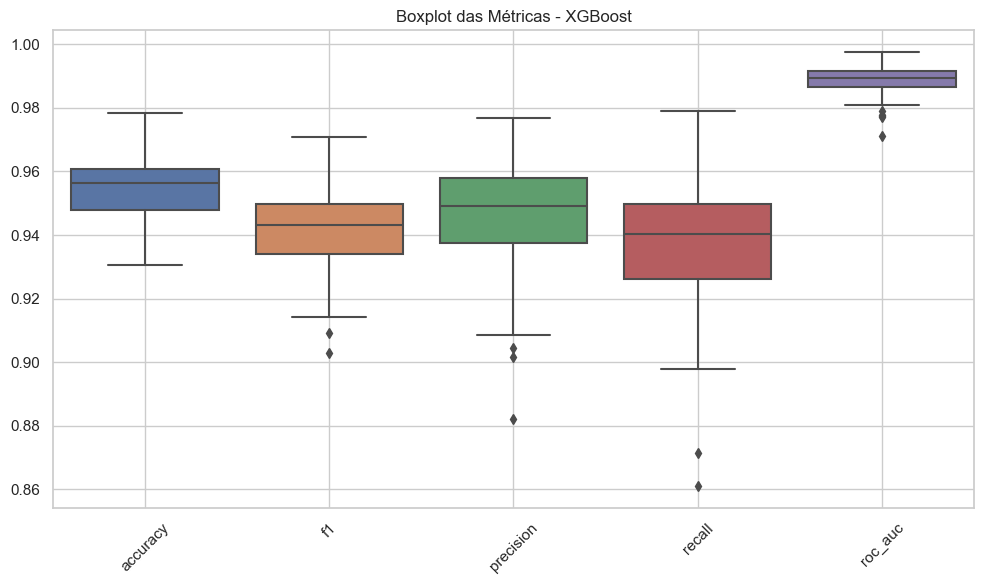

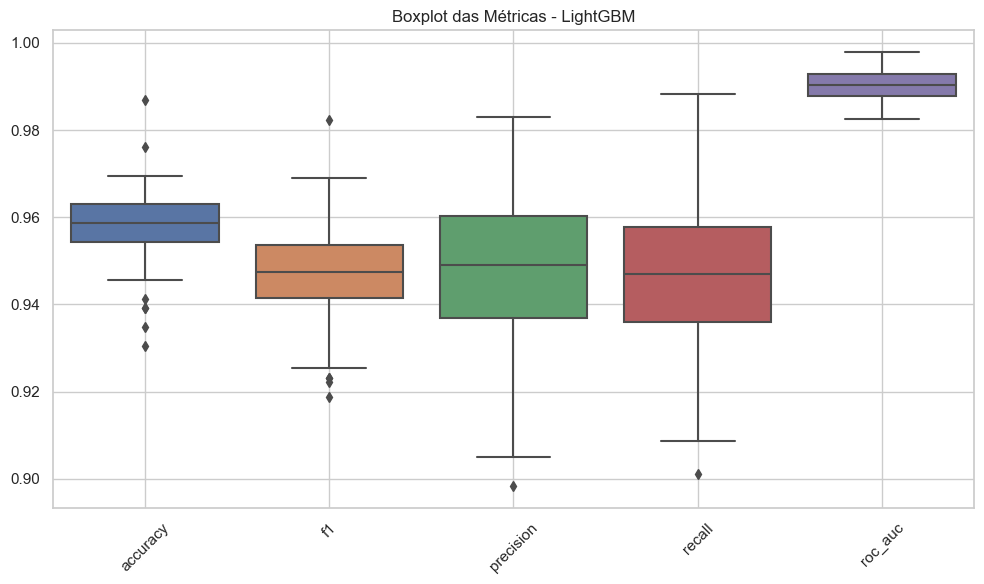

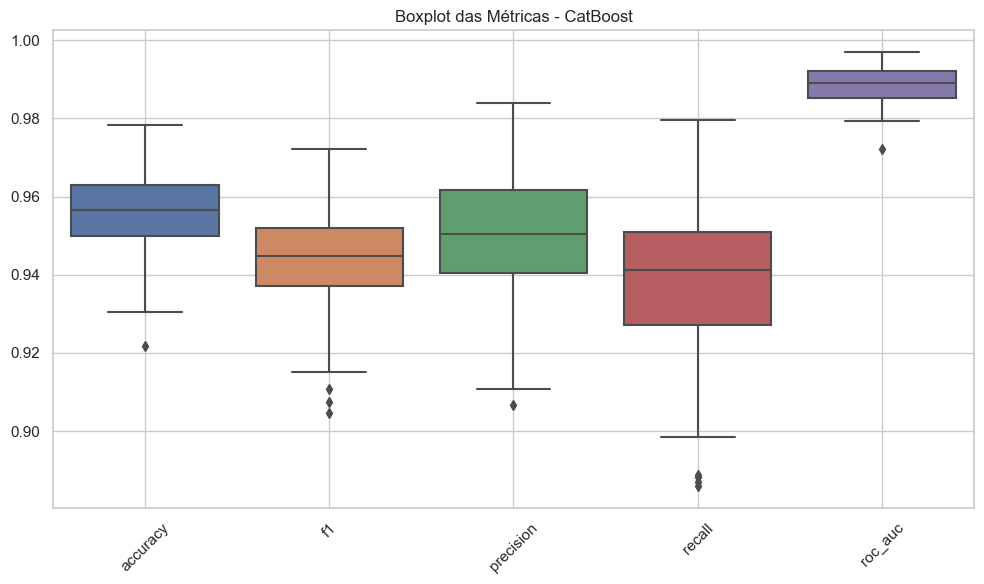

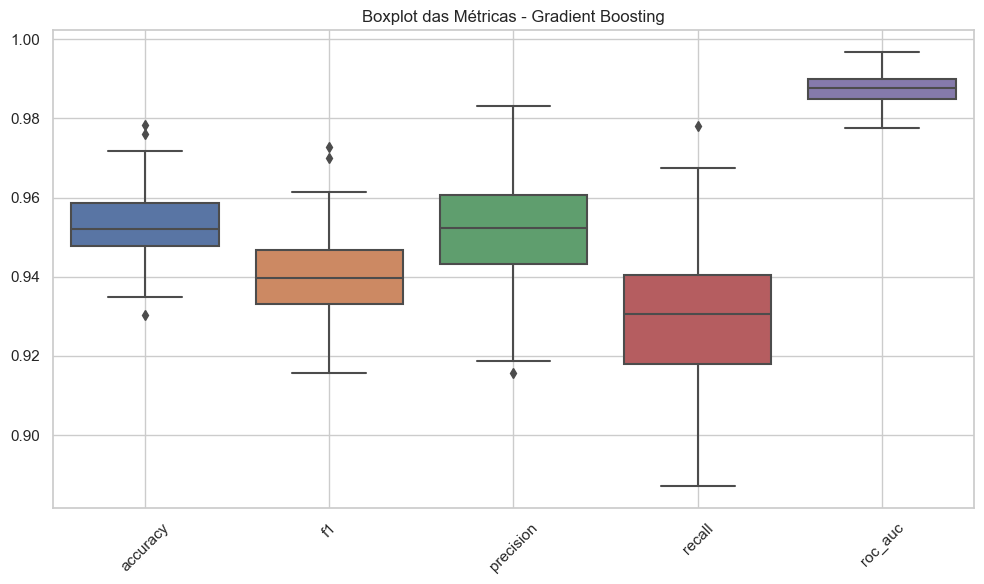

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Função para plotar apenas os boxplots
def plot_boxplots(results, model_name):
    plt.figure(figsize=(10, 6))
    
    # Gráfico de Boxplot para as métricas
    sns.boxplot(data=results)
    plt.title(f'Boxplot das Métricas - {model_name}')
    plt.xticks(rotation=45)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Dados para cada modelo
xgb_results = pd.DataFrame({
    'accuracy': cross_val_cancer_scores['xgb']['test_accuracy'],
    'f1': cross_val_cancer_scores['xgb']['test_f1'],
    'precision': cross_val_cancer_scores['xgb']['test_precision'],
    'recall': cross_val_cancer_scores['xgb']['test_recall'],
    'roc_auc': cross_val_cancer_scores['xgb']['test_roc_auc']
})

lgb_results = pd.DataFrame({
    'accuracy': cross_val_cancer_scores['lgb']['test_accuracy'],
    'f1': cross_val_cancer_scores['lgb']['test_f1'],
    'precision': cross_val_cancer_scores['lgb']['test_precision'],
    'recall': cross_val_cancer_scores['lgb']['test_recall'],
    'roc_auc': cross_val_cancer_scores['lgb']['test_roc_auc']
})

cat_results = pd.DataFrame({
    'accuracy': cross_val_cancer_scores['cat']['test_accuracy'],
    'f1': cross_val_cancer_scores['cat']['test_f1'],
    'precision': cross_val_cancer_scores['cat']['test_precision'],
    'recall': cross_val_cancer_scores['cat']['test_recall'],
    'roc_auc': cross_val_cancer_scores['cat']['test_roc_auc']
})

gb_results = pd.DataFrame({
    'accuracy': cross_val_cancer_scores['gb']['test_accuracy'],
    'f1': cross_val_cancer_scores['gb']['test_f1'],
    'precision': cross_val_cancer_scores['gb']['test_precision'],
    'recall': cross_val_cancer_scores['gb']['test_recall'],
    'roc_auc': cross_val_cancer_scores['gb']['test_roc_auc']
})

# Plotar os boxplots para cada modelo
plot_boxplots(xgb_results, "XGBoost")
plot_boxplots(lgb_results, "LightGBM")
plot_boxplots(cat_results, "CatBoost")
plot_boxplots(gb_results, "Gradient Boosting")